# BSBT-6060-001 - Final Project 2019 - Arsen Ghasabyan

## Name of the Project: ex.: Identifying the best predictors of massive transfusion in urban Level 1 Trauma Center

In [1]:
#Importing packages to be used
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.plotting
%matplotlib inline

from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from collections import Counter

pd.set_option('display.max_rows', 999) 
pd.set_option('display.max_columns', 999)
pd.set_option('display.width', 1000)

In [2]:
#reading in the Clinical and Demographics data (first tab) of .xlsx file and formatting the date containing variables
df1 = pd.read_excel('Data/Trauma_Studies_Master_Data_2019-11-11.xlsx', sheet_name="Demographics & Clinical Course")
df1.head(3)

,id,sex,ethnicity,race,age,height,weight,bmi,iss,niss,maxais_headneck,maxais_face,maxais_chest,maxais_abdomenpelvis,maxais_extremities,maxais_external,injury_date,Injury_time,arrival_date,arrival_time,bluntpenetrating,mechanism,field_sbp,field_dbp,field_hr,field_gcs,ed_sbp,ed_dbp,ed_hr,ed_rr,ed_gcs,ed_temp,fast_y,fast_result,edt,field_wbc,field_hgb,field_hct,field_pltcount,field_protime,field_inr,field_ptt,field_fibrinogen,field_ddimer,clinicallab_date,clinicallab_time,arrival_lab_timefrominj,first_hospital_ph,first_hospital_paco2,first_hospital_pao2,first_hospital_bicarb,first_hospital_be,first_hospital_potassium,first_hospital_vco2,first_hospital_creatinine,first_hospital_glucose,first_hospital_calcium,first_hospital_ioncalcium,first_hospital_lactate,first_hospital_wbc,first_hospital_hgb,first_hospital_hct,first_hospital_pltcount,first_hospital_protime,first_hospital_inr,first_hospital_ptt,first_hospital_fibrinogen,first_hospital_ddimer,first_hospital_act,first_hospital_sp,first_hospital_r,first_hospital_k,first_hospital_angle,first_hospital_ma,first_hospital_g,first_hospital_ly30,blood_type,first_hospital_ethanol_performed,first_hospital_ethanol_result,first_hospital_toxscreenperformed,first_hospital_amphetamines,first_hospital_barbiturates,first_hospital_benzodiazepines,first_hospital_cocainemetabolites,first_hospital_methadone,first_hospital_opioids,field_crystalloid_ml,field_ffp,ed_hr1_crystalloid_ml,ed_hr1_rbc_units,ed_hr1_ffp_units,ed_hr1_plt_units,ed_hr1_cryo_units,ed_hr1_aca_g,ed_hr1_txa_mg,hr1_2_crystalloid_ml,hr1_2_rbc_units,hr1_2_ffp_units,hr1_2_plt_units,hr1_2_cryo_units,hr1_2_aca_g,hr1_2_txa_mg,hr2_4_crystalloid_ml,hr2_4_rbc_units,hr2_4_ffp_units,hr2_4_plt_units,hr2_4_cryo_units,hr2_4_aca_g,hr2_4_txa_mg,hr4_6_crystalloid_ml,hr4_6_rbc_units,hr4_6_ffp_units,hr4_6_plt_units,hr4_6_cryo_units,hr4_6_aca_g,hr4_6_txa_mg,hr6_12_crystalloid_ml,hr6_12_rbc_units,hr6_12_ffp_units,hr6_12_plt_units,hr6_12_cryo_units,hr6_12_aca_g,hr6_12_txa_mg,hr12_24_crystalloid_ml,hr12_24_rbc_units,hr12_24_ffp_units,hr12_24_plt_units,hr12_24_cryo_units,hr12_24_aca_g,hr12_24_txa_mg,total6hrs_crystalloid_ml,total6hrs_rbc_units,total6hrs_ffp_units,total6hrs_plt_units,total6hrs_cryo_units,total6hrs_aca_g,total6hrs_txa_mg,total24hrs_crystalloid_ml,total24hrs_rbc_units,total24hrs_ffp_units,total24hrs_plt_units,total24hrs_cryo_units,total24hrs_aca_g,total24hrs_txa_mg,comorbidity_1,comorbidity_2,comorbidity_3,comorbidity_4,comorbidity_other,medication_1,medication_2,medication_3,medication_4,medication_other,surgery_attending,tacticscore_ed,tacticscore_or,tacticscore_icu,injury_class,bleedingcontrol_date,bleedingcontrol_time,timefrominjurytobleedcontrol,death,death_date,death_time,survival_time,earlydeath,latedeath,coagulopathyremarks,preventability,los,icudays,ventdays,procedure1,procedure2,procedure3,procedure4,procedure5,procedure6,procedure7,procedure8,procedure9,procedure10,procedure_other,complications_1,complications_1_hospitalday,complications_2,complications_2_hospitalday,complications_3,complications_3_hospitalday,complications_4,complications_4_hospitalday,complications_5,complications_5_hospitalday,complications_6,complications_6_hospitalday,complications_7,complications_7_hospitalday,Unnamed: 198,dc_date,disposition,Unnamed: 201
0,C-001,M,Not_Hispanic_or_Latino,White,23.0,1.778,74.0,23.4,NaN,50,5,1,3,2,0,1,2014-04-09,1900-01-03 22:20:00,2014-04-09,1900-01-03 22:42:00,Blunt,Motorcycle Crash,0.0,NaN,90.0,3.0,72,40.0,131,28.0,3.0,36.6,Y,Negative,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-04-09,1900-01-03 22:56:00,0.60,7.17,116.0,NaN,40.0,NaN,6.2,15.0,NaN,NaN,9.4,NaN,10.0,10.1,9.9,32.3,148.0,NaN,2.36,42.8,59.99,20.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,250,0,1000,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1250.0,3,2,0,0,0,0,1250.0,3,2,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stovall,2.0,NaN,NaN,E,2014-04-09,1900-01-03 23:07:00,0.78,Y,2014-04-09,1900-01-03 23:07:

### Exploring clinical and demographics data
df1 dataset has 1067 observations and 202 features.
Command 'dtypes' breakes down all the features by Pandas data type; roughtly 1/3 of my features are floats, 1/3 are integers and 1/3 are objects. Command 'describe' shows basic distribution of all features to help with identifying data outliers and errors.
    

In [3]:
#df1.shape

#df1.dtypes

df1.describe()



,age,height,weight,bmi,iss,niss,maxais_headneck,maxais_face,maxais_chest,maxais_abdomenpelvis,maxais_extremities,maxais_external,field_sbp,field_dbp,field_hr,field_gcs,ed_sbp,ed_dbp,ed_hr,ed_rr,ed_gcs,ed_temp,field_wbc,field_hgb,field_hct,field_pltcount,field_protime,field_inr,field_ptt,field_fibrinogen,field_ddimer,arrival_lab_timefrominj,first_hospital_ph,first_hospital_paco2,first_hospital_pao2,first_hospital_bicarb,first_hospital_be,first_hospital_potassium,first_hospital_vco2,first_hospital_creatinine,first_hospital_glucose,first_hospital_calcium,first_hospital_ioncalcium,first_hospital_lactate,first_hospital_wbc,first_hospital_hgb,first_hospital_hct,first_hospital_pltcount,first_hospital_protime,first_hospital_inr,first_hospital_ptt,first_hospital_fibrinogen,first_hospital_ddimer,first_hospital_act,first_hospital_sp,first_hospital_r,first_hospital_k,first_hospital_angle,first_hospital_ma,first_hospital_g,first_hospital_ly30,first_hospital_ethanol_result,field_crystalloid_ml,field_ffp,ed_hr1_crystalloid_ml,ed_hr1_rbc_units,ed_hr1_ffp_units,ed_hr1_plt_units,ed_hr1_cryo_units,ed_hr1_aca_g,ed_hr1_txa_mg,hr1_2_crystalloid_ml,hr1_2_rbc_units,hr1_2_ffp_units,hr1_2_plt_units,hr1_2_cryo_units,hr1_2_aca_g,hr1_2_txa_mg,hr2_4_crystalloid_ml,hr2_4_rbc_units,hr2_4_ffp_units,hr2_4_plt_units,hr2_4_cryo_units,hr2_4_aca_g,hr2_4_txa_mg,hr4_6_crystalloid_ml,hr4_6_rbc_units,hr4_6_ffp_units,hr4_6_plt_units,hr4_6_cryo_units,hr4_6_aca_g,hr4_6_txa_mg,hr6_12_crystalloid_ml,hr6_12_rbc_units,hr6_12_ffp_units,hr6_12_plt_units,hr6_12_cryo_units,hr6_12_aca_g,hr6_12_txa_mg,hr12_24_crystalloid_ml,hr12_24_rbc_units,hr12_24_ffp_units,hr12_24_plt_units,hr12_24_cryo_units,hr12_24_aca_g,hr12_24_txa_mg,total6hrs_crystalloid_ml,total6hrs_rbc_units,total6hrs_ffp_units,total6hrs_plt_units,total6hrs_cryo_units,total6hrs_aca_g,total6hrs_txa_mg,total24hrs_crystalloid_ml,total24hrs_rbc_units,total24hrs_ffp_units,total24hrs_plt_units,total24hrs_cryo_units,total24hrs_aca_g,total24hrs_txa_mg,tacticscore_ed,tacticscore_or,tacticscore_icu,timefrominjurytobleedcontrol,survival_time,los,icudays,ventdays,procedure10,complications_1_hospitalday,complications_2_hospitalday,complications_3_hospitalday,complications_4_hospitalday,complications_5_hospitalday,complications_6,complications_6_hospitalday,complications_7,complications_7_hospitalday
count,1067.000000,915.000000,980.000000,912.000000,942.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,997.000000,325.000000,1009.000000,999.000000,1067.000000,716.000000,1067.000000,718.000000,1056.000000,763.000000,60.000000,60.000000,60.00000,60.000000,0.0,93.000000,92.000000,87.000000,84.000000,1047.000000,847.000000,848.000000,271.000000,845.000000,846.000000,1027.000000,1017.000000,255.000000,260.000000,1014.000000,418.000000,600.000000,1028.000000,1036.000000,1036.000000,1036.000000,258.000000,1021.000000,1014.000000,427.000000,388.000000,827.000000,827.000000,827.000000,819.000000,827.000000,827.000000,827.000000,827.000000,607.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,986.000000,556.000000,508.000000,326.000000,155.000000,1067.000000,1067.000000,1067.000000,0.0,234.000000,93.000000,32.000000,12.000000,3.000000,0.0,0.0,0.0,0.0
mean,38.063355,1.741302,81.942167,27.090384,18.351380,24.255858,1.277413,0.381443,1.410497,1.059044,1.180881,0.765698,102.269809,60.972308,9

In [4]:
#exploring how many 'object' features there are in the dataset

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Columns: 202 entries, id to Unnamed: 201
dtypes: datetime64[ns](11), float64(71), int64(67), object(53)
memory usage: 1.6+ MB


In [5]:
#running this code will show how many unique values each variable has; this will help us to determine which ones are 
#worth converting to categorical variables
unique_counts = pd.DataFrame.from_records([(col, df1[col].nunique()) for col in df1.columns], 
                                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
194,complications_6,0
196,complications_7,0
197,complications_7_hospitalday,0
39,field_protime,0
182,procedure10,0
195,complications_6_hospitalday,0
121,hr6_12_aca_g,1
128,hr12_24_aca_g,1
107,hr2_4_aca_g,1
114,hr4_6_aca_g,1


In [6]:
# the table above showed we have 5 categories of 'fast_results' (6 with NaN). We should only have 4; printing out all unique values of a column
df1['fast_result'].unique()

array(['Negative', nan, 'Positive', 'Equivocal', 'Postivie', 'Postive'],
      dtype=object)

In [7]:
#finding misspelled values in a column

df1.loc[df1['fast_result'] == 'Postivie']
# df1.loc[df1['fast_result'] == 'Postive']


,id,sex,ethnicity,race,age,height,weight,bmi,iss,niss,maxais_headneck,maxais_face,maxais_chest,maxais_abdomenpelvis,maxais_extremities,maxais_external,injury_date,Injury_time,arrival_date,arrival_time,bluntpenetrating,mechanism,field_sbp,field_dbp,field_hr,field_gcs,ed_sbp,ed_dbp,ed_hr,ed_rr,ed_gcs,ed_temp,fast_y,fast_result,edt,field_wbc,field_hgb,field_hct,field_pltcount,field_protime,field_inr,field_ptt,field_fibrinogen,field_ddimer,clinicallab_date,clinicallab_time,arrival_lab_timefrominj,first_hospital_ph,first_hospital_paco2,first_hospital_pao2,first_hospital_bicarb,first_hospital_be,first_hospital_potassium,first_hospital_vco2,first_hospital_creatinine,first_hospital_glucose,first_hospital_calcium,first_hospital_ioncalcium,first_hospital_lactate,first_hospital_wbc,first_hospital_hgb,first_hospital_hct,first_hospital_pltcount,first_hospital_protime,first_hospital_inr,first_hospital_ptt,first_hospital_fibrinogen,first_hospital_ddimer,first_hospital_act,first_hospital_sp,first_hospital_r,first_hospital_k,first_hospital_angle,first_hospital_ma,first_hospital_g,first_hospital_ly30,blood_type,first_hospital_ethanol_performed,first_hospital_ethanol_result,first_hospital_toxscreenperformed,first_hospital_amphetamines,first_hospital_barbiturates,first_hospital_benzodiazepines,first_hospital_cocainemetabolites,first_hospital_methadone,first_hospital_opioids,field_crystalloid_ml,field_ffp,ed_hr1_crystalloid_ml,ed_hr1_rbc_units,ed_hr1_ffp_units,ed_hr1_plt_units,ed_hr1_cryo_units,ed_hr1_aca_g,ed_hr1_txa_mg,hr1_2_crystalloid_ml,hr1_2_rbc_units,hr1_2_ffp_units,hr1_2_plt_units,hr1_2_cryo_units,hr1_2_aca_g,hr1_2_txa_mg,hr2_4_crystalloid_ml,hr2_4_rbc_units,hr2_4_ffp_units,hr2_4_plt_units,hr2_4_cryo_units,hr2_4_aca_g,hr2_4_txa_mg,hr4_6_crystalloid_ml,hr4_6_rbc_units,hr4_6_ffp_units,hr4_6_plt_units,hr4_6_cryo_units,hr4_6_aca_g,hr4_6_txa_mg,hr6_12_crystalloid_ml,hr6_12_rbc_units,hr6_12_ffp_units,hr6_12_plt_units,hr6_12_cryo_units,hr6_12_aca_g,hr6_12_txa_mg,hr12_24_crystalloid_ml,hr12_24_rbc_units,hr12_24_ffp_units,hr12_24_plt_units,hr12_24_cryo_units,hr12_24_aca_g,hr12_24_txa_mg,total6hrs_crystalloid_ml,total6hrs_rbc_units,total6hrs_ffp_units,total6hrs_plt_units,total6hrs_cryo_units,total6hrs_aca_g,total6hrs_txa_mg,total24hrs_crystalloid_ml,total24hrs_rbc_units,total24hrs_ffp_units,total24hrs_plt_units,total24hrs_cryo_units,total24hrs_aca_g,total24hrs_txa_mg,comorbidity_1,comorbidity_2,comorbidity_3,comorbidity_4,comorbidity_other,medication_1,medication_2,medication_3,medication_4,medication_other,surgery_attending,tacticscore_ed,tacticscore_or,tacticscore_icu,injury_class,bleedingcontrol_date,bleedingcontrol_time,timefrominjurytobleedcontrol,death,death_date,death_time,survival_time,earlydeath,latedeath,coagulopathyremarks,preventability,los,icudays,ventdays,procedure1,procedure2,procedure3,procedure4,procedure5,procedure6,procedure7,procedure8,procedure9,procedure10,procedure_other,complications_1,complications_1_hospitalday,complications_2,complications_2_hospitalday,complications_3,complications_3_hospitalday,complications_4,complications_4_hospitalday,complications_5,complications_5_hospitalday,complications_6,complications_6_hospitalday,complications_7,complications_7_hospitalday,Unnamed: 198,dc_date,disposition,Unnamed: 201
663,10556,M,Hispanic_or_Latino,Unknown,24.5,1.803,95.0,29.22,33.0,43,0,0,5,2,2,1,2017-09-03,1900-01-03 19:00:00,2017-09-03,1900-01-03 19:23:00,Blunt,Motorcycle Crash,90.0,NaN,120.0,14.0,73,53.0,91,24.0,14.0,NaN,Y,Postivie,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-03,1900-01-03 19:35:00,0.58,7.23,34.0,NaN,14.0,-12.4,3.4,18.0,NaN,NaN,7.6,1.05,5.4,13.3,14.0,41.0,300.0,NaN,1.36,35.1,NaN,NaN,121.0,0.6,0.8,2.7,60.2,53.6,5.8,0.0,O POS,Y,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,200,0,1800,2,0,0,0,0,0,5000,4,4,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,127,0,0,0,0,0,0,1249.0,0,0,0,0,0,0,7000.0,7,4,1,2,0,0,8376.0,7,4,1,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Burlew,2.0,3.0,1.0,D,2017-09-03,1900-01-03 20:17:00,1.28,N,NaT,NaT,NaN,Na

In [8]:
# replacing misspelled values with the correct one

df1.replace(to_replace =["Postivie", "Postive"],  value ="Positive", inplace=True) 

In [9]:
df1

,id,sex,ethnicity,race,age,height,weight,bmi,iss,niss,maxais_headneck,maxais_face,maxais_chest,maxais_abdomenpelvis,maxais_extremities,maxais_external,injury_date,Injury_time,arrival_date,arrival_time,bluntpenetrating,mechanism,field_sbp,field_dbp,field_hr,field_gcs,ed_sbp,ed_dbp,ed_hr,ed_rr,ed_gcs,ed_temp,fast_y,fast_result,edt,field_wbc,field_hgb,field_hct,field_pltcount,field_protime,field_inr,field_ptt,field_fibrinogen,field_ddimer,clinicallab_date,clinicallab_time,arrival_lab_timefrominj,first_hospital_ph,first_hospital_paco2,first_hospital_pao2,first_hospital_bicarb,first_hospital_be,first_hospital_potassium,first_hospital_vco2,first_hospital_creatinine,first_hospital_glucose,first_hospital_calcium,first_hospital_ioncalcium,first_hospital_lactate,first_hospital_wbc,first_hospital_hgb,first_hospital_hct,first_hospital_pltcount,first_hospital_protime,first_hospital_inr,first_hospital_ptt,first_hospital_fibrinogen,first_hospital_ddimer,first_hospital_act,first_hospital_sp,first_hospital_r,first_hospital_k,first_hospital_angle,first_hospital_ma,first_hospital_g,first_hospital_ly30,blood_type,first_hospital_ethanol_performed,first_hospital_ethanol_result,first_hospital_toxscreenperformed,first_hospital_amphetamines,first_hospital_barbiturates,first_hospital_benzodiazepines,first_hospital_cocainemetabolites,first_hospital_methadone,first_hospital_opioids,field_crystalloid_ml,field_ffp,ed_hr1_crystalloid_ml,ed_hr1_rbc_units,ed_hr1_ffp_units,ed_hr1_plt_units,ed_hr1_cryo_units,ed_hr1_aca_g,ed_hr1_txa_mg,hr1_2_crystalloid_ml,hr1_2_rbc_units,hr1_2_ffp_units,hr1_2_plt_units,hr1_2_cryo_units,hr1_2_aca_g,hr1_2_txa_mg,hr2_4_crystalloid_ml,hr2_4_rbc_units,hr2_4_ffp_units,hr2_4_plt_units,hr2_4_cryo_units,hr2_4_aca_g,hr2_4_txa_mg,hr4_6_crystalloid_ml,hr4_6_rbc_units,hr4_6_ffp_units,hr4_6_plt_units,hr4_6_cryo_units,hr4_6_aca_g,hr4_6_txa_mg,hr6_12_crystalloid_ml,hr6_12_rbc_units,hr6_12_ffp_units,hr6_12_plt_units,hr6_12_cryo_units,hr6_12_aca_g,hr6_12_txa_mg,hr12_24_crystalloid_ml,hr12_24_rbc_units,hr12_24_ffp_units,hr12_24_plt_units,hr12_24_cryo_units,hr12_24_aca_g,hr12_24_txa_mg,total6hrs_crystalloid_ml,total6hrs_rbc_units,total6hrs_ffp_units,total6hrs_plt_units,total6hrs_cryo_units,total6hrs_aca_g,total6hrs_txa_mg,total24hrs_crystalloid_ml,total24hrs_rbc_units,total24hrs_ffp_units,total24hrs_plt_units,total24hrs_cryo_units,total24hrs_aca_g,total24hrs_txa_mg,comorbidity_1,comorbidity_2,comorbidity_3,comorbidity_4,comorbidity_other,medication_1,medication_2,medication_3,medication_4,medication_other,surgery_attending,tacticscore_ed,tacticscore_or,tacticscore_icu,injury_class,bleedingcontrol_date,bleedingcontrol_time,timefrominjurytobleedcontrol,death,death_date,death_time,survival_time,earlydeath,latedeath,coagulopathyremarks,preventability,los,icudays,ventdays,procedure1,procedure2,procedure3,procedure4,procedure5,procedure6,procedure7,procedure8,procedure9,procedure10,procedure_other,complications_1,complications_1_hospitalday,complications_2,complications_2_hospitalday,complications_3,complications_3_hospitalday,complications_4,complications_4_hospitalday,complications_5,complications_5_hospitalday,complications_6,complications_6_hospitalday,complications_7,complications_7_hospitalday,Unnamed: 198,dc_date,disposition,Unnamed: 201
0,C-001,M,Not_Hispanic_or_Latino,White,23.0,1.778,74.0,23.40,NaN,50,5,1,3,2,0,1,2014-04-09,1900-01-03 22:20:00,2014-04-09,1900-01-03 22:42:00,Blunt,Motorcycle Crash,0.0,NaN,90.0,3.0,72,40.0,131,28.0,3.0,36.6,Y,Negative,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-04-09,1900-01-03 22:56:00,0.60,7.17,116.0,NaN,40.0,NaN,6.2,15.0,NaN,NaN,9.4,NaN,10.0,10.1,9.9,32.3,148.0,NaN,2.36,42.8,59.99,20.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,250,0,1000,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1250.0,3,2,0,0,0,0,1250.0,3,2,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stovall,2.0,NaN,NaN,E,2014-04-09,1900-01-03 23:07:00,0.78,Y,2014-04-09,1900-01-03 23:07

In [10]:
# making sure the replacement worked: yes, we have only 4 possible answeres

df1['fast_result']

0       Negative
1            NaN
2            NaN
3       Negative
4            NaN
          ...   
1062    Negative
1063    Negative
1064    Positive
1065    Negative
1066    Negative
Name: fast_result, Length: 1067, dtype: object

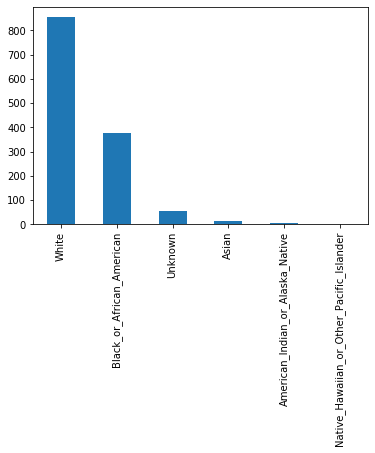

In [11]:
#data exploration on categorical variables
df1["sex"].value_counts().plot.bar()
df1["ethnicity"].value_counts().plot.bar()
df1["race"].value_counts().plot.bar()

plt.show()

In [12]:
#data exploration on continuous variables
df1.niss.describe()
df1.age.describe()
df1.bmi.describe()

count    912.000000
mean      27.090384
std        5.805344
min       15.150000
25%       23.270000
50%       25.810000
75%       29.802500
max       52.190000
Name: bmi, dtype: float64

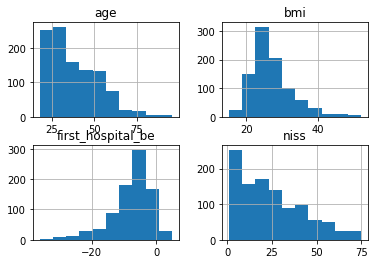

In [13]:
df = pd.DataFrame(df1, columns = ['age', 'niss', 'bmi', 'first_hospital_be'] ) 
  
# create histogram for numeric data 
df.hist() 
  
# show plot 
plt.show() 

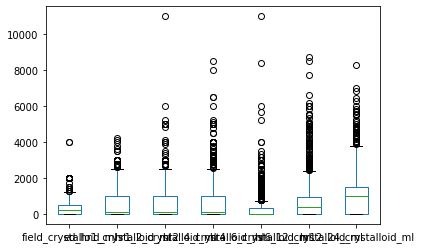

In [14]:
#graphing crystalloid infusion by time bin
df = pd.DataFrame(data = df1, columns = ['field_crystalloid_ml', 'ed_hr1_crystalloid_ml', 'hr1_2_crystalloid_ml', 
                                         'hr2_4_crystalloid_ml', 'hr4_6_crystalloid_ml', 'hr6_12_crystalloid_ml', 
                                         'hr12_24_crystalloid_ml'])
df.plot.box()


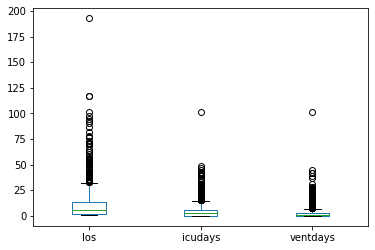

In [15]:
#graphing los, icudays and ventdays

df = pd.DataFrame(data = df1, columns = ['los', 'icudays', 'ventdays'])

df.head()
df.plot.box()


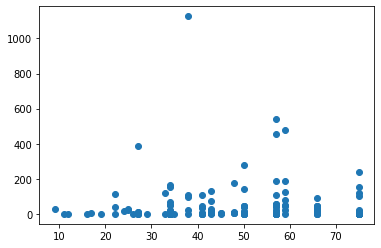

In [16]:
#length of survival of deceased patients in hours by severity of injury
plt.scatter(df1['niss'], df1['survival_time']) 
plt.show()

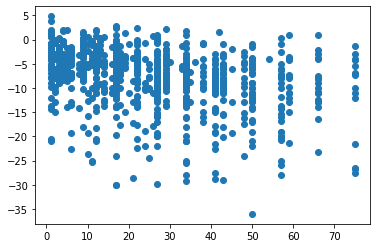

In [17]:
#degree of shock by severity of injury
plt.scatter(df1['niss'], df1['first_hospital_be']) 
plt.show()


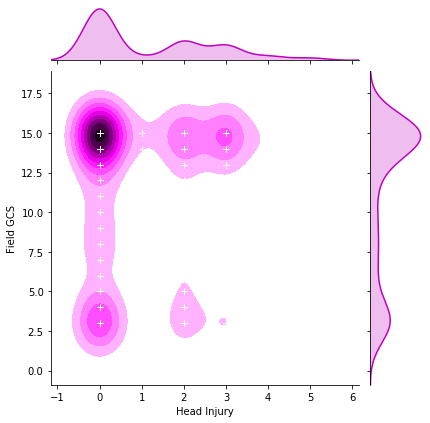

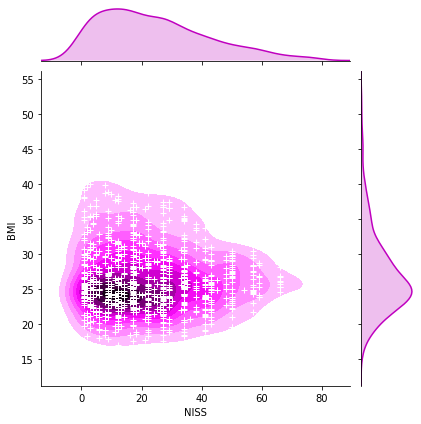

In [18]:
# Needs to be revisited after heatmap - visualizing some relationships with a joinplot
g = sns.jointplot(x="maxais_extremities", y="field_gcs", data=df1, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("Head Injury", "Field GCS");

g = sns.jointplot(x="niss", y="bmi", data=df1, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("NISS", "BMI");

## Creating new variables, categorizing and formatting existing ones

In [19]:
#categorizing variable "age" into threee categories using Pandas.qcut function as well as categorizing variable "age" 
#into conventional categories using Pandas.cut function
df1['ageQgroup'] = pd.qcut(df1.age, 3, labels=["young", "middleage", "old"], retbins=False)
df1['ageGroup'] = pd.cut(df1.age, [0, 24, 34, 44, 54, 64, 100], labels=["18-24", "25-34", "35-44", "45-54", "55-64", 
                                                                        "65+"])

In [20]:
df1.head(5)

,id,sex,ethnicity,race,age,height,weight,bmi,iss,niss,maxais_headneck,maxais_face,maxais_chest,maxais_abdomenpelvis,maxais_extremities,maxais_external,injury_date,Injury_time,arrival_date,arrival_time,bluntpenetrating,mechanism,field_sbp,field_dbp,field_hr,field_gcs,ed_sbp,ed_dbp,ed_hr,ed_rr,ed_gcs,ed_temp,fast_y,fast_result,edt,field_wbc,field_hgb,field_hct,field_pltcount,field_protime,field_inr,field_ptt,field_fibrinogen,field_ddimer,clinicallab_date,clinicallab_time,arrival_lab_timefrominj,first_hospital_ph,first_hospital_paco2,first_hospital_pao2,first_hospital_bicarb,first_hospital_be,first_hospital_potassium,first_hospital_vco2,first_hospital_creatinine,first_hospital_glucose,first_hospital_calcium,first_hospital_ioncalcium,first_hospital_lactate,first_hospital_wbc,first_hospital_hgb,first_hospital_hct,first_hospital_pltcount,first_hospital_protime,first_hospital_inr,first_hospital_ptt,first_hospital_fibrinogen,first_hospital_ddimer,first_hospital_act,first_hospital_sp,first_hospital_r,first_hospital_k,first_hospital_angle,first_hospital_ma,first_hospital_g,first_hospital_ly30,blood_type,first_hospital_ethanol_performed,first_hospital_ethanol_result,first_hospital_toxscreenperformed,first_hospital_amphetamines,first_hospital_barbiturates,first_hospital_benzodiazepines,first_hospital_cocainemetabolites,first_hospital_methadone,first_hospital_opioids,field_crystalloid_ml,field_ffp,ed_hr1_crystalloid_ml,ed_hr1_rbc_units,ed_hr1_ffp_units,ed_hr1_plt_units,ed_hr1_cryo_units,ed_hr1_aca_g,ed_hr1_txa_mg,hr1_2_crystalloid_ml,hr1_2_rbc_units,hr1_2_ffp_units,hr1_2_plt_units,hr1_2_cryo_units,hr1_2_aca_g,hr1_2_txa_mg,hr2_4_crystalloid_ml,hr2_4_rbc_units,hr2_4_ffp_units,hr2_4_plt_units,hr2_4_cryo_units,hr2_4_aca_g,hr2_4_txa_mg,hr4_6_crystalloid_ml,hr4_6_rbc_units,hr4_6_ffp_units,hr4_6_plt_units,hr4_6_cryo_units,hr4_6_aca_g,hr4_6_txa_mg,hr6_12_crystalloid_ml,hr6_12_rbc_units,hr6_12_ffp_units,hr6_12_plt_units,hr6_12_cryo_units,hr6_12_aca_g,hr6_12_txa_mg,hr12_24_crystalloid_ml,hr12_24_rbc_units,hr12_24_ffp_units,hr12_24_plt_units,hr12_24_cryo_units,hr12_24_aca_g,hr12_24_txa_mg,total6hrs_crystalloid_ml,total6hrs_rbc_units,total6hrs_ffp_units,total6hrs_plt_units,total6hrs_cryo_units,total6hrs_aca_g,total6hrs_txa_mg,total24hrs_crystalloid_ml,total24hrs_rbc_units,total24hrs_ffp_units,total24hrs_plt_units,total24hrs_cryo_units,total24hrs_aca_g,total24hrs_txa_mg,comorbidity_1,comorbidity_2,comorbidity_3,comorbidity_4,comorbidity_other,medication_1,medication_2,medication_3,medication_4,medication_other,surgery_attending,tacticscore_ed,tacticscore_or,tacticscore_icu,injury_class,bleedingcontrol_date,bleedingcontrol_time,timefrominjurytobleedcontrol,death,death_date,death_time,survival_time,earlydeath,latedeath,coagulopathyremarks,preventability,los,icudays,ventdays,procedure1,procedure2,procedure3,procedure4,procedure5,procedure6,procedure7,procedure8,procedure9,procedure10,procedure_other,complications_1,complications_1_hospitalday,complications_2,complications_2_hospitalday,complications_3,complications_3_hospitalday,complications_4,complications_4_hospitalday,complications_5,complications_5_hospitalday,complications_6,complications_6_hospitalday,complications_7,complications_7_hospitalday,Unnamed: 198,dc_date,disposition,Unnamed: 201,ageQgroup,ageGroup
0,C-001,M,Not_Hispanic_or_Latino,White,23.0,1.778,74.0,23.4,NaN,50,5,1,3,2,0,1,2014-04-09,1900-01-03 22:20:00,2014-04-09,1900-01-03 22:42:00,Blunt,Motorcycle Crash,0.0,NaN,90.0,3.0,72,40.0,131,28.0,3.0,36.6,Y,Negative,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-04-09,1900-01-03 22:56:00,0.60,7.17,116.0,NaN,40.0,NaN,6.2,15.0,NaN,NaN,9.4,NaN,10.0,10.1,9.9,32.3,148.0,NaN,2.36,42.8,59.99,20.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,250,0,1000,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1250.0,3,2,0,0,0,0,1250.0,3,2,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stovall,2.0,NaN,NaN,E,2014-04-09,1900-01-03 23:07:00,0.78,Y,2014-04-0

In [21]:
#converting data type of some variables from 'object' to 'categorical' when appropriate

to_convert = ['death', 'preventability', 'sex', 'edt', 'bluntpenetrating', 'fast_y', 'ethnicity', 'fast_result', 
              'tacticscore_icu', 'tacticscore_or', 'tacticscore_ed', 'race', 'blood_type', 'mechanism', 'ageGroup', 
              'ageQgroup']; 
df1[to_convert] = df1[to_convert].astype('category')


In [22]:
#df1.dtypes
df1['fast_result'].unique


<bound method Series.unique of 0       Negative
1            NaN
2            NaN
3       Negative
4            NaN
          ...   
1062    Negative
1063    Negative
1064    Positive
1065    Negative
1066    Negative
Name: fast_result, Length: 1067, dtype: category
Categories (3, object): [Equivocal, Negative, Positive]>

In [23]:
#creating new variables to convert crystalloid fluids from mL to unit (1,000mL = 1 unit); later these variables will 
#be used to calculate Resuscitation Intensity (RI) score
df1 = df1.assign(field_crystalloid_unit=df1['field_crystalloid_ml']/1000,
           ed_hr1_crystalloid_unit=df1['ed_hr1_crystalloid_ml']/1000,
           hr1_2_crystalloid_unit=df1['hr1_2_crystalloid_ml']/1000,
           hr2_4_crystalloid_unit=df1['hr2_4_crystalloid_ml']/1000,
           hr4_6_crystalloid_unit=df1['hr4_6_crystalloid_ml']/1000,
           hr6_12_crystalloid_unit=df1['hr6_12_crystalloid_ml']/1000,
           hr12_24_crystalloid_unit=df1['hr12_24_crystalloid_ml']/1000)


In [24]:
print(df1.columns)
df1.head()

Index(['id', 'sex', 'ethnicity', 'race', 'age', 'height', 'weight', 'bmi', 'iss', 'niss',
       ...
       'Unnamed: 201', 'ageQgroup', 'ageGroup', 'field_crystalloid_unit', 'ed_hr1_crystalloid_unit', 'hr1_2_crystalloid_unit', 'hr2_4_crystalloid_unit', 'hr4_6_crystalloid_unit', 'hr6_12_crystalloid_unit', 'hr12_24_crystalloid_unit'], dtype='object', length=211)


,id,sex,ethnicity,race,age,height,weight,bmi,iss,niss,maxais_headneck,maxais_face,maxais_chest,maxais_abdomenpelvis,maxais_extremities,maxais_external,injury_date,Injury_time,arrival_date,arrival_time,bluntpenetrating,mechanism,field_sbp,field_dbp,field_hr,field_gcs,ed_sbp,ed_dbp,ed_hr,ed_rr,ed_gcs,ed_temp,fast_y,fast_result,edt,field_wbc,field_hgb,field_hct,field_pltcount,field_protime,field_inr,field_ptt,field_fibrinogen,field_ddimer,clinicallab_date,clinicallab_time,arrival_lab_timefrominj,first_hospital_ph,first_hospital_paco2,first_hospital_pao2,first_hospital_bicarb,first_hospital_be,first_hospital_potassium,first_hospital_vco2,first_hospital_creatinine,first_hospital_glucose,first_hospital_calcium,first_hospital_ioncalcium,first_hospital_lactate,first_hospital_wbc,first_hospital_hgb,first_hospital_hct,first_hospital_pltcount,first_hospital_protime,first_hospital_inr,first_hospital_ptt,first_hospital_fibrinogen,first_hospital_ddimer,first_hospital_act,first_hospital_sp,first_hospital_r,first_hospital_k,first_hospital_angle,first_hospital_ma,first_hospital_g,first_hospital_ly30,blood_type,first_hospital_ethanol_performed,first_hospital_ethanol_result,first_hospital_toxscreenperformed,first_hospital_amphetamines,first_hospital_barbiturates,first_hospital_benzodiazepines,first_hospital_cocainemetabolites,first_hospital_methadone,first_hospital_opioids,field_crystalloid_ml,field_ffp,ed_hr1_crystalloid_ml,ed_hr1_rbc_units,ed_hr1_ffp_units,ed_hr1_plt_units,ed_hr1_cryo_units,ed_hr1_aca_g,ed_hr1_txa_mg,hr1_2_crystalloid_ml,hr1_2_rbc_units,hr1_2_ffp_units,hr1_2_plt_units,hr1_2_cryo_units,hr1_2_aca_g,hr1_2_txa_mg,hr2_4_crystalloid_ml,hr2_4_rbc_units,hr2_4_ffp_units,hr2_4_plt_units,hr2_4_cryo_units,hr2_4_aca_g,hr2_4_txa_mg,hr4_6_crystalloid_ml,hr4_6_rbc_units,hr4_6_ffp_units,hr4_6_plt_units,hr4_6_cryo_units,hr4_6_aca_g,hr4_6_txa_mg,hr6_12_crystalloid_ml,hr6_12_rbc_units,hr6_12_ffp_units,hr6_12_plt_units,hr6_12_cryo_units,hr6_12_aca_g,hr6_12_txa_mg,hr12_24_crystalloid_ml,hr12_24_rbc_units,hr12_24_ffp_units,hr12_24_plt_units,hr12_24_cryo_units,hr12_24_aca_g,hr12_24_txa_mg,total6hrs_crystalloid_ml,total6hrs_rbc_units,total6hrs_ffp_units,total6hrs_plt_units,total6hrs_cryo_units,total6hrs_aca_g,total6hrs_txa_mg,total24hrs_crystalloid_ml,total24hrs_rbc_units,total24hrs_ffp_units,total24hrs_plt_units,total24hrs_cryo_units,total24hrs_aca_g,total24hrs_txa_mg,comorbidity_1,comorbidity_2,comorbidity_3,comorbidity_4,comorbidity_other,medication_1,medication_2,medication_3,medication_4,medication_other,surgery_attending,tacticscore_ed,tacticscore_or,tacticscore_icu,injury_class,bleedingcontrol_date,bleedingcontrol_time,timefrominjurytobleedcontrol,death,death_date,death_time,survival_time,earlydeath,latedeath,coagulopathyremarks,preventability,los,icudays,ventdays,procedure1,procedure2,procedure3,procedure4,procedure5,procedure6,procedure7,procedure8,procedure9,procedure10,procedure_other,complications_1,complications_1_hospitalday,complications_2,complications_2_hospitalday,complications_3,complications_3_hospitalday,complications_4,complications_4_hospitalday,complications_5,complications_5_hospitalday,complications_6,complications_6_hospitalday,complications_7,complications_7_hospitalday,Unnamed: 198,dc_date,disposition,Unnamed: 201,ageQgroup,ageGroup,field_crystalloid_unit,ed_hr1_crystalloid_unit,hr1_2_crystalloid_unit,hr2_4_crystalloid_unit,hr4_6_crystalloid_unit,hr6_12_crystalloid_unit,hr12_24_crystalloid_unit
0,C-001,M,Not_Hispanic_or_Latino,White,23.0,1.778,74.0,23.4,NaN,50,5,1,3,2,0,1,2014-04-09,1900-01-03 22:20:00,2014-04-09,1900-01-03 22:42:00,Blunt,Motorcycle Crash,0.0,NaN,90.0,3.0,72,40.0,131,28.0,3.0,36.6,Y,Negative,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-04-09,1900-01-03 22:56:00,0.60,7.17,116.0,NaN,40.0,NaN,6.2,15.0,NaN,NaN,9.4,NaN,10.0,10.1,9.9,32.3,148.0,NaN,2.36,42.8,59.99,20.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,250,0,1000,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [25]:
#combining dates and times in one feature '_datetime'


df1['injury_datetime'] = df1['injury_date'] + pd.to_timedelta(df1['Injury_time'])

df1['arrival_datetime'] = df1['arrival_date'] + pd.to_timedelta(df1['arrival_time'])

df1['clinicallab_datetime'] = df1['clinicallab_date'] + pd.to_timedelta(df1['clinicallab_time'])

df1['bleedingcontrol_datetime'] = df1['bleedingcontrol_date'] + pd.to_timedelta(df1['bleedingcontrol_time'])

df1['death_datetime'] = df1['death_date'] + pd.to_timedelta(df1['death_time'])

df1['death_datetime'] = df1['death_date'] + pd.to_timedelta(df1['death_time'])



/Users/arson/anaconda3/envs/sklearn_dev22/lib/python3.7/site-packages/pandas/util/_decorators.py:208: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version
  return func(*args, **kwargs)


### Definitions of Massive Transfussion (MT):
 - mt_1 >= 10 units of RBCs in 24 hours
 - mt_2 >= 6 units of RBCs in 6 hours
 - mt_3 >= 4 units of RBCs in 4 hours
 - mt_4 >= 10 units of RBCs between ED and SICU admission
 - mt_cat >= 3 units of RBCs in first hour of resuscitation
 - mt_ri >= 4 units of combined fluids (crystalloid, colloids and blood products) in first 30 minutes of resuscitation

In [26]:
#creating new variables for MT definitions
df1['mt_1'] = ['yes' if x >= 10 else 'no' for x in df1['total24hrs_rbc_units']]
df1['mt_2'] = ['yes' if x >= 6 else 'no' for x in df1['total6hrs_rbc_units']]
df1['mt_3'] = ['yes' if x >= 4 else 'no' for x in (df1['ed_hr1_rbc_units'] + df1['hr1_2_rbc_units'] + 
                                                   df1['hr2_4_rbc_units'])]

#we do not record the time of SICU admission in the database, therefore, the mt_4 cannot be calculated
df1['mt_cat'] = ['yes' if x >= 3 else 'no' for x in df1['ed_hr1_rbc_units']]
df1['mt_ri'] = ['yes' if x >= 4 else 'no' for x in (df1 ['field_ffp'] + df1['ed_hr1_rbc_units'] + df1['ed_hr1_ffp_units'] + 
                                                    df1['ed_hr1_plt_units'] + df1['ed_hr1_cryo_units'] + 
                                                    df1['ed_hr1_crystalloid_unit'])]
df1.head(5)

,id,sex,ethnicity,race,age,height,weight,bmi,iss,niss,maxais_headneck,maxais_face,maxais_chest,maxais_abdomenpelvis,maxais_extremities,maxais_external,injury_date,Injury_time,arrival_date,arrival_time,bluntpenetrating,mechanism,field_sbp,field_dbp,field_hr,field_gcs,ed_sbp,ed_dbp,ed_hr,ed_rr,ed_gcs,ed_temp,fast_y,fast_result,edt,field_wbc,field_hgb,field_hct,field_pltcount,field_protime,field_inr,field_ptt,field_fibrinogen,field_ddimer,clinicallab_date,clinicallab_time,arrival_lab_timefrominj,first_hospital_ph,first_hospital_paco2,first_hospital_pao2,first_hospital_bicarb,first_hospital_be,first_hospital_potassium,first_hospital_vco2,first_hospital_creatinine,first_hospital_glucose,first_hospital_calcium,first_hospital_ioncalcium,first_hospital_lactate,first_hospital_wbc,first_hospital_hgb,first_hospital_hct,first_hospital_pltcount,first_hospital_protime,first_hospital_inr,first_hospital_ptt,first_hospital_fibrinogen,first_hospital_ddimer,first_hospital_act,first_hospital_sp,first_hospital_r,first_hospital_k,first_hospital_angle,first_hospital_ma,first_hospital_g,first_hospital_ly30,blood_type,first_hospital_ethanol_performed,first_hospital_ethanol_result,first_hospital_toxscreenperformed,first_hospital_amphetamines,first_hospital_barbiturates,first_hospital_benzodiazepines,first_hospital_cocainemetabolites,first_hospital_methadone,first_hospital_opioids,field_crystalloid_ml,field_ffp,ed_hr1_crystalloid_ml,ed_hr1_rbc_units,ed_hr1_ffp_units,ed_hr1_plt_units,ed_hr1_cryo_units,ed_hr1_aca_g,ed_hr1_txa_mg,hr1_2_crystalloid_ml,hr1_2_rbc_units,hr1_2_ffp_units,hr1_2_plt_units,hr1_2_cryo_units,hr1_2_aca_g,hr1_2_txa_mg,hr2_4_crystalloid_ml,hr2_4_rbc_units,hr2_4_ffp_units,hr2_4_plt_units,hr2_4_cryo_units,hr2_4_aca_g,hr2_4_txa_mg,hr4_6_crystalloid_ml,hr4_6_rbc_units,hr4_6_ffp_units,hr4_6_plt_units,hr4_6_cryo_units,hr4_6_aca_g,hr4_6_txa_mg,hr6_12_crystalloid_ml,hr6_12_rbc_units,hr6_12_ffp_units,hr6_12_plt_units,hr6_12_cryo_units,hr6_12_aca_g,hr6_12_txa_mg,hr12_24_crystalloid_ml,hr12_24_rbc_units,hr12_24_ffp_units,hr12_24_plt_units,hr12_24_cryo_units,hr12_24_aca_g,hr12_24_txa_mg,total6hrs_crystalloid_ml,total6hrs_rbc_units,total6hrs_ffp_units,total6hrs_plt_units,total6hrs_cryo_units,total6hrs_aca_g,total6hrs_txa_mg,total24hrs_crystalloid_ml,total24hrs_rbc_units,total24hrs_ffp_units,total24hrs_plt_units,total24hrs_cryo_units,total24hrs_aca_g,total24hrs_txa_mg,comorbidity_1,comorbidity_2,comorbidity_3,comorbidity_4,comorbidity_other,medication_1,medication_2,medication_3,medication_4,medication_other,surgery_attending,tacticscore_ed,tacticscore_or,tacticscore_icu,injury_class,bleedingcontrol_date,bleedingcontrol_time,timefrominjurytobleedcontrol,death,death_date,death_time,survival_time,earlydeath,latedeath,coagulopathyremarks,preventability,los,icudays,ventdays,procedure1,procedure2,procedure3,procedure4,procedure5,procedure6,procedure7,procedure8,procedure9,procedure10,procedure_other,complications_1,complications_1_hospitalday,complications_2,complications_2_hospitalday,complications_3,complications_3_hospitalday,complications_4,complications_4_hospitalday,complications_5,complications_5_hospitalday,complications_6,complications_6_hospitalday,complications_7,complications_7_hospitalday,Unnamed: 198,dc_date,disposition,Unnamed: 201,ageQgroup,ageGroup,field_crystalloid_unit,ed_hr1_crystalloid_unit,hr1_2_crystalloid_unit,hr2_4_crystalloid_unit,hr4_6_crystalloid_unit,hr6_12_crystalloid_unit,hr12_24_crystalloid_unit,injury_datetime,arrival_datetime,clinicallab_datetime,bleedingcontrol_datetime,death_datetime,mt_1,mt_2,mt_3,mt_cat,mt_ri
0,C-001,M,Not_Hispanic_or_Latino,White,23.0,1.778,74.0,23.4,NaN,50,5,1,3,2,0,1,2014-04-09,1900-01-03 22:20:00,2014-04-09,1900-01-03 22:42:00,Blunt,Motorcycle Crash,0.0,NaN,90.0,3.0,72,40.0,131,28.0,3.0,36.6,Y,Negative,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-04-09,1900-01-03 22:56:00,0.60,7.17,116.0,NaN,40.0,NaN,6.2,15.0,NaN,NaN,9.4,NaN,10.0,10.1,9.9,32.3,148.0,NaN,2.36,42.8,59.99,20.010,NaN,NaN,NaN,NaN,NaN,NaN

In [27]:
# converting newly created features to categorical 

to_convert = ['mt_1', 'mt_2', 'mt_3', 'mt_cat', 'mt_ri']; 
df1[to_convert] = df1[to_convert].astype('category')


In [28]:
# check number & percentage of missing values in the columns
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df1)

Your selected dataframe has 221 columns and 1067 Rows.
There are 116 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
procedure10,0,1067,100.0,1067,100.0,float64
field_protime,0,1067,100.0,1067,100.0,float64
complications_7_hospitalday,0,1067,100.0,1067,100.0,float64
complications_7,0,1067,100.0,1067,100.0,float64
complications_6_hospitalday,0,1067,100.0,1067,100.0,float64
complications_6,0,1067,100.0,1067,100.0,float64
procedure_other,0,1066,99.9,1066,99.9,object
procedure9,0,1065,99.8,1065,99.8,object
first_hospital_methadone,0,1064,99.7,1064,99.7,object
complications_5_hospitalday,0,1064,99.7,1064,99.7,float64


## According to above table we have 70 variables with 50 or more percent of missing data. 

In [29]:
#creating a new df named "comps" with a dummy variable "vte" to combine "Pulmonary Embolus " (extra space in the .xlsx file) and "DVT"
df1['vte'] = df1.filter(regex="complications_\d+$").isin(['Pulmonary Embolus ', 'DVT']).sum(1)


#printing first 200 observations to make sure we count both "DVT" and "Pulmonary Embolus "
#df1.head(201)


In [30]:
#df1.vte.describe()

In [31]:
#replacing '2' with '1' to make "vte" dichotomous
df1.vte.replace(2, 1, inplace=True)

In [32]:
#df1.head()

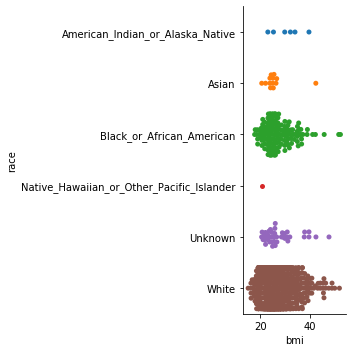

In [33]:
#creating a catplot to investigate the relationship between 'race' and 'bmi'

sns.catplot(x="bmi", y="race", kind="swarm", data=df1);

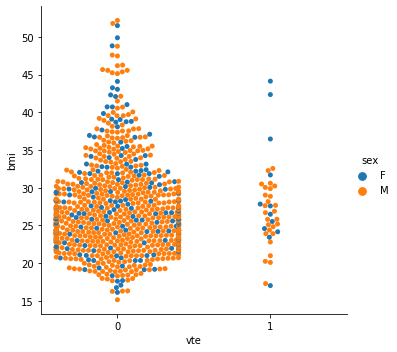

In [34]:
#creating a catplot to investigate the relationship between 'vte' and 'bmi' by 'sex'

sns.catplot(x="vte", y="bmi", hue="sex", kind="swarm", data=df1);

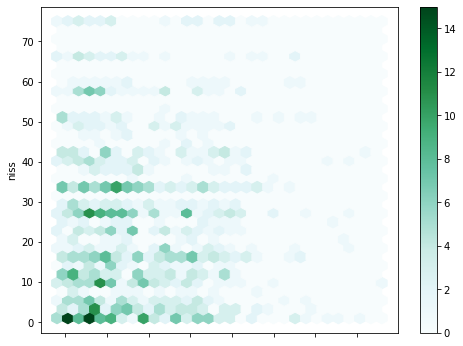

In [35]:
#visualizing two numeric features with hexbin
df1.plot.hexbin(x='age', y='niss', gridsize=30, figsize=(8,6))

In [36]:
df1.head(5)

df1['fast_result'].unique

<bound method Series.unique of 0       Negative
1            NaN
2            NaN
3       Negative
4            NaN
          ...   
1062    Negative
1063    Negative
1064    Positive
1065    Negative
1066    Negative
Name: fast_result, Length: 1067, dtype: category
Categories (3, object): [Equivocal, Negative, Positive]>

In [37]:
#dropping columns we don't need for further analysis (either have high percentage of missing data or don't have 
#predictive value for our purposes)

df1_short = df1.drop(['Injury_time', 'Unnamed: 198', 'Unnamed: 201', 'arrival_date', 'arrival_datetime', 
                      'arrival_time', 'bleedingcontrol_date', 'bleedingcontrol_time', 'clinicallab_date', 
                      'clinicallab_time', 'coagulopathyremarks', 'comorbidity_1', 'comorbidity_2', 'comorbidity_3', 
                      'comorbidity_4', 'comorbidity_other', 'complications_1', 'complications_1_hospitalday', 
                      'complications_2', 'complications_2_hospitalday', 'complications_3', 
                      'complications_3_hospitalday', 'complications_4', 'complications_4_hospitalday', 
                      'complications_5', 'complications_5_hospitalday', 'complications_6', 
                      'complications_6_hospitalday', 'complications_7', 'complications_7_hospitalday', 'dc_date', 
                      'death_date', 'death_time', 'disposition', 'earlydeath', 'ed_hr1_aca_g', 'ed_hr1_cryo_units', 
                      'ed_hr1_crystalloid_ml', 'ed_hr1_crystalloid_unit', 'ed_hr1_ffp_units', 'ed_hr1_plt_units', 
                      'ed_hr1_rbc_units', 'ed_hr1_txa_mg', 'field_ddimer', 'field_fibrinogen', 'field_hct', 
                      'field_hgb', 'field_hr', 'field_inr', 'field_pltcount', 'field_protime', 'field_ptt', 
                      'field_wbc', 'first_hospital_amphetamines', 'first_hospital_barbiturates', 
                      'first_hospital_benzodiazepines', 'first_hospital_cocainemetabolites', 
                      'first_hospital_ethanol_performed', 'first_hospital_ethanol_result', 'first_hospital_methadone',
                      'first_hospital_opioids', 'height', 'hr12_24_aca_g', 'hr12_24_cryo_units', 
                      'hr12_24_crystalloid_ml', 'hr12_24_crystalloid_unit', 'hr12_24_ffp_units', 'hr12_24_plt_units', 
                      'hr12_24_rbc_units', 'hr12_24_txa_mg', 'hr1_2_aca_g', 'hr1_2_cryo_units', 'hr1_2_crystalloid_ml',
                      'hr1_2_crystalloid_unit', 'hr1_2_ffp_units', 'hr1_2_plt_units', 'hr1_2_rbc_units', 
                      'hr1_2_txa_mg', 'hr2_4_aca_g', 'hr2_4_cryo_units', 'hr2_4_crystalloid_ml', 
                      'hr2_4_crystalloid_unit', 'hr2_4_ffp_units', 'hr2_4_plt_units', 'hr2_4_rbc_units', 
                      'hr2_4_txa_mg', 'hr4_6_aca_g', 'hr4_6_cryo_units', 'hr4_6_crystalloid_ml', 
                      'hr4_6_crystalloid_unit', 'hr4_6_ffp_units', 'hr4_6_plt_units', 'hr4_6_rbc_units', 
                      'hr4_6_txa_mg', 'hr6_12_aca_g', 'hr6_12_cryo_units', 'hr6_12_crystalloid_ml', 
                      'hr6_12_crystalloid_unit', 'hr6_12_ffp_units', 'hr6_12_plt_units', 'hr6_12_rbc_units', 
                      'hr6_12_txa_mg', 'icudays', 'injury_class', 'injury_date', 'injury_datetime', 'iss', 
                      'latedeath', 'los', 'medication_1', 'medication_2', 'medication_3', 'medication_4', 
                      'medication_other', 'preventability', 'procedure1', 'procedure10', 'procedure2', 'procedure3', 
                      'procedure4', 'procedure5', 'procedure6', 'procedure7', 'procedure8', 'procedure9', 
                      'procedure_other', 'surgery_attending', 'survival_time', 'tacticscore_ed', 'tacticscore_icu', 
                      'tacticscore_or', 'total24hrs_aca_g', 'total24hrs_cryo_units', 'total24hrs_crystalloid_ml', 
                      'total24hrs_ffp_units', 'total24hrs_plt_units', 'total24hrs_rbc_units', 'total24hrs_txa_mg', 
                      'total6hrs_aca_g', 'total6hrs_cryo_units', 'total6hrs_crystalloid_ml', 'total6hrs_ffp_units', 
                      'total6hrs_plt_units', 'total6hrs_rbc_units', 'total6hrs_txa_mg', 'ventdays', 'vte', 'weight'], 
                     axis=1)
#df1_short = df.drop(df1.columns[0], axis =1)
df1_short.columns

Index(['id', 'sex', 'ethnicity', 'race', 'age', 'bmi', 'niss', 'maxais_headneck', 'maxais_face', 'maxais_chest', 'maxais_abdomenpelvis', 'maxais_extremities', 'maxais_external', 'bluntpenetrating', 'mechanism', 'field_sbp', 'field_dbp', 'field_gcs', 'ed_sbp', 'ed_dbp', 'ed_hr', 'ed_rr', 'ed_gcs', 'ed_temp', 'fast_y', 'fast_result', 'edt', 'arrival_lab_timefrominj', 'first_hospital_ph', 'first_hospital_paco2', 'first_hospital_pao2', 'first_hospital_bicarb', 'first_hospital_be', 'first_hospital_potassium', 'first_hospital_vco2', 'first_hospital_creatinine', 'first_hospital_glucose', 'first_hospital_calcium', 'first_hospital_ioncalcium', 'first_hospital_lactate', 'first_hospital_wbc', 'first_hospital_hgb', 'first_hospital_hct', 'first_hospital_pltcount', 'first_hospital_protime', 'first_hospital_inr', 'first_hospital_ptt', 'first_hospital_fibrinogen', 'first_hospital_ddimer', 'first_hospital_act', 'first_hospital_sp', 'first_hospital_r', 'first_hospital_k', 'first_hospital_angle',
       

In [38]:
#examining the abbreviated dataset

df1_short.describe()

,age,bmi,niss,maxais_headneck,maxais_face,maxais_chest,maxais_abdomenpelvis,maxais_extremities,maxais_external,field_sbp,field_dbp,field_gcs,ed_sbp,ed_dbp,ed_hr,ed_rr,ed_gcs,ed_temp,arrival_lab_timefrominj,first_hospital_ph,first_hospital_paco2,first_hospital_pao2,first_hospital_bicarb,first_hospital_be,first_hospital_potassium,first_hospital_vco2,first_hospital_creatinine,first_hospital_glucose,first_hospital_calcium,first_hospital_ioncalcium,first_hospital_lactate,first_hospital_wbc,first_hospital_hgb,first_hospital_hct,first_hospital_pltcount,first_hospital_protime,first_hospital_inr,first_hospital_ptt,first_hospital_fibrinogen,first_hospital_ddimer,first_hospital_act,first_hospital_sp,first_hospital_r,first_hospital_k,first_hospital_angle,first_hospital_ma,first_hospital_g,first_hospital_ly30,field_crystalloid_ml,field_ffp,timefrominjurytobleedcontrol,field_crystalloid_unit
count,1067.000000,912.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,997.000000,325.000000,999.000000,1067.000000,716.000000,1067.000000,718.000000,1056.000000,763.000000,1047.000000,847.000000,848.000000,271.000000,845.000000,846.000000,1027.000000,1017.000000,255.000000,260.000000,1014.000000,418.000000,600.000000,1028.000000,1036.000000,1036.000000,1036.000000,258.000000,1021.000000,1014.000000,427.000000,388.000000,827.000000,827.000000,827.000000,819.000000,827.000000,827.000000,827.000000,827.000000,1067.000000,1067.000000,326.000000,1067.000000
mean,38.063355,27.090384,24.255858,1.277413,0.381443,1.410497,1.059044,1.180881,0.765698,102.269809,60.972308,10.995996,111.593252,71.459497,94.864105,20.942897,11.176136,36.423578,0.606103,7.292609,37.863208,165.918819,18.123077,-7.759220,3.606339,20.447001,1.018627,153.603846,8.089250,1.045933,5.361500,10.870136,13.717857,41.614961,252.856178,15.086434,1.226259,30.963383,233.353536,6.333420,123.720677,0.618259,0.794559,1.585836,72.549577,59.977630,8.122854,5.022854,302.054358,0.119963,2.278865,0.302054
std,14.787477,5.805344,19.048451,1.850380,0.789086,1.691553,1.554296,1.452206,0.670628,44.414559,33.212501,4.883203,41.698298,27.425776,33.182300,6.654940,4.937067,1.080984,0.603216,0.148973,10.771104,100.741183,4.398567,6.127561,0.724896,4.173024,0.275049,83.683219,1.001585,0.283636,4.422643,5.530710,2.303570,6.373130,86.159012,3.247904,0.411381,18.059891,91.300971,7.300775,75.606126,0.332126,0.800957,1.380875,9.091405,9.974154,2.648102,14.455651,413.064556,0.473148,3.286750,0.413065
min,18.000000,15.150000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,26.300000,0.070000,6.610000,11.000000,34.000000,3.000000,-36.000000,1.800000,5.000000,0.460000,61.000000,4.900000,0.200000,0.500000,0.700000,3.700000,15.900000,9.000000,11.600000,0.800000,12.600000,59.990000,0.269000,66.000000,0.200000,0.200000,0.800000,2.200000,1.800000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.050000,23.270000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000,40.000000,6.000000,90.000000,60.000000,78.000000,17.000000,6.000000,36.300000,0.420000,7.230000,32.000000,83.000000,16.000000,-10.375000,3.200000,18.000000,0.850000,108.000000,7.600000,0.960000,2.600000,7.600000,12.500000,38.275000,201.000000,13.400000,1.030000,24.100000,172.000000,0.550000,105.000000,0.500000,0.600000,1.000000,70.400000,56.800000,6.600000,0.200000,0.000000,0.000000,0.600000,0.000000
50%,34.100000,25.810000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,100.000000,66.000000,14.000000,118.000000,74.000000,98.000000,20.000000,14.000000,36.600000,0.530000,7.320000,37.000000,131.000000,19.000000,-6.700000,3.500000,21.000000,1.000000,130.500000,8.100000,1.060000,3.900000,9.800000,13.900000,42.300000,250.000000,14.200000,1.110000,26.900000,220.000000,2.585000,113.000000,0.600000,0.700000,1.200000,74.500000,61.600000,8.100000,1.200000,200.000000,0.000000,1.270000,0.200000
75%,48.950000

In [39]:
# check number & percentage of missing values in the columns
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df1_short)

Your selected dataframe has 74 columns and 1067 Rows.
There are 44 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
death_datetime,0,912,85.5,912,85.5,datetime64[ns]
first_hospital_creatinine,0,812,76.1,812,76.1,float64
first_hospital_protime,0,809,75.8,809,75.8,float64
first_hospital_glucose,0,807,75.6,807,75.6,float64
first_hospital_pao2,0,796,74.6,796,74.6,float64
field_dbp,50,742,69.5,792,74.2,float64
timefrominjurytobleedcontrol,2,741,69.4,743,69.6,float64
bleedingcontrol_datetime,0,739,69.3,739,69.3,datetime64[ns]
first_hospital_ddimer,0,679,63.6,679,63.6,float64
first_hospital_ioncalcium,0,649,60.8,649,60.8,float64


## According to above table we now have only 9 variables with 50 or more percent of missing data. 

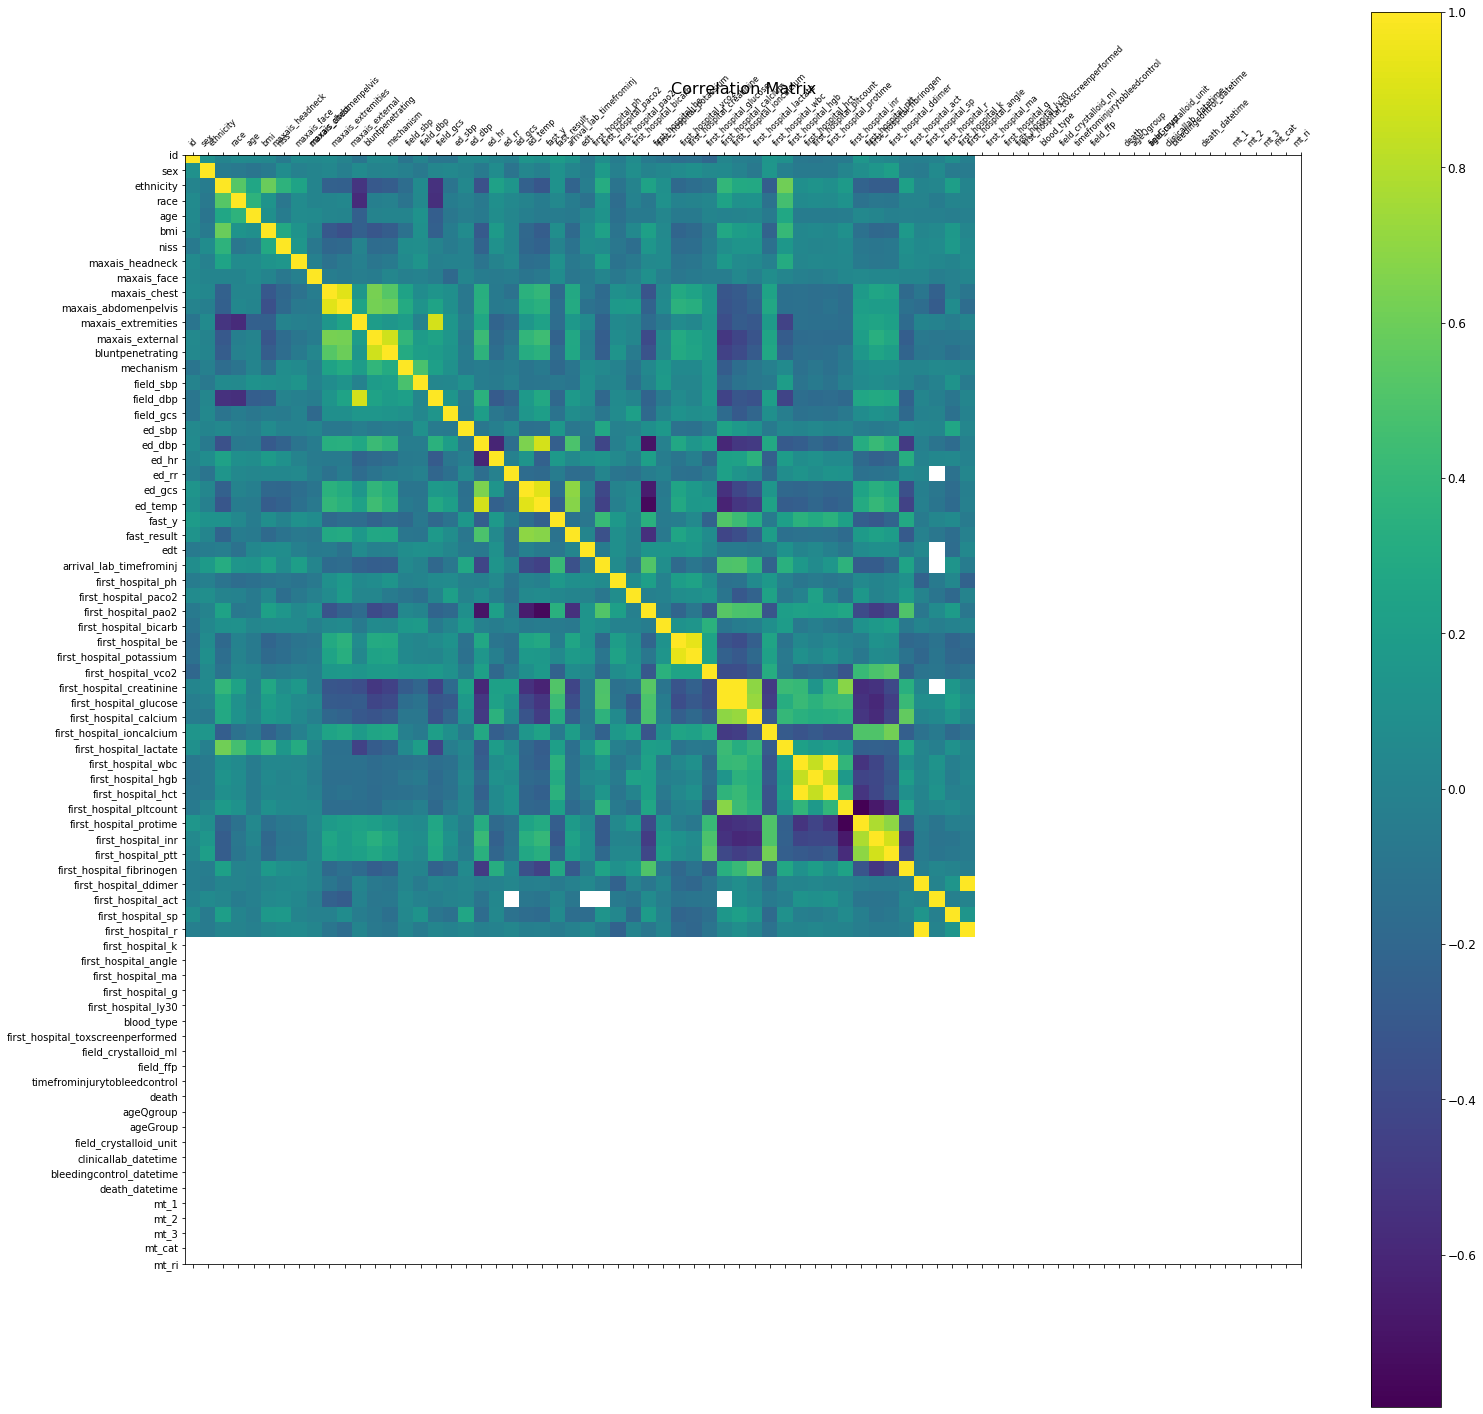

In [40]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(25, 25))
plt.matshow(df1_short.corr(), fignum=f.number)
plt.xticks(range(df1_short.shape[1]), df1_short.columns, fontsize=8, rotation=45)
plt.yticks(range(df1_short.shape[1]), df1_short.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix', fontsize=16);

In [41]:
#reading in the Vitals and Labs data (first tab) of .xlsx file and formatting the date containing variables
df2 = pd.read_excel('Data/Trauma_Studies_Master_Data_2019-11-11.xlsx', sheet_name="First 24 Hours Vitals & Labs")

df2.head()

,ID,ed_hr1_sbp,ed_hr1_dbp,ed_hr1_hr,ed_hr1_gcs,ed_hr1_temp,hr1_2_sbp,hr1_2_dbp,hr1_2_hr,hr1_2_gcs,hr1_2_temp,hr2_4_sbp,hr2_4_dbp,hr2_4_hr,hr2_4_gcs,hr2_4_temp,hr4_6_sbp,hr4_6_dbp,hr4_6_hr,hr4_6_gcs,hr4_6_temp,hr6_12_sbp,hr6_12_dbp,hr6_12_hr,hr6_12_gcs,hr6_12_temp,hr12_24_sbp,hr12_24_dbp,hr12_24_hr,hr12_24_gcs,hr12_24_temp,hr24_48_sbp,hr24_48_dbp,hr24_48_hr,hr24_48_gcs,hr24_48_temp,ed_hr1_ph,ed_hr1_paco2,ed_hr1_pao2,ed_hr1_bicarb,ed_hr1_be,ed_hr1_potassium,ed_hr1_vco2,ed_hr1_creatinine,ed_hr1_glucose,ed_hr1_calcium,ed_hr1_ioncalcium,ed_hr1_lactate,ed_hr1_wbc,ed_hr1_hgb,ed_hr1_hct,ed_hr1_pltcount,ed_hr1_protime,ed_hr1_inr,ed_hr1_ptt,ed_hr1_fibrinogen,ed_hr1_ddimer,ed_hr1_act,ed_hr1_sp,ed_hr1_r,ed_hr1_k,ed_hr1_angle,ed_hr1_ma,ed_hr1_g,ed_hr1_ly30,hr1_2_ph,hr1_2_paco2,hr1_2_pao2,hr1_2_bicarb,hr1_2_be,hr1_2_potassium,hr1_2_vco2,hr1_2_creatinine,hr1_2_glucose,hr1_2_calcium,hr1_2_ioncalcium,hr1_2_lactate,hr1_2_wbc,hr1_2_hgb,hr1_2_hct,hr1_2_pltcount,hr1_2_protime,hr1_2_inr,hr1_2_ptt,hr1_2_fibrinogen,hr1_2_ddimer,hr1_2_act,hr1_2_sp,hr1_2_r,hr1_2_k,hr1_2_angle,hr1_2_ma,hr1_2_g,hr1_2_ly30,hr2_4_ph,hr2_4_paco2,hr2_4_pao2,hr2_4_bicarb,hr2_4_be,hr2_4_potassium,hr2_4_vco2,hr2_4_creatinine,hr2_4_glucose,hr2_4_calcium,hr2_4_ioncalcium,hr2_4_lactate,hr2_4_wbc,hr2_4_hgb,hr2_4_hct,hr2_4_pltcount,hr2_4_protime,hr2_4_inr,hr2_4_ptt,hr2_4_fibrinogen,hr2_4_ddimer,hr2_4_act,hr2_4_sp,hr2_4_r,hr2_4_k,hr2_4_angle,hr2_4_ma,hr2_4_g,hr2_4_ly30,hr4_6_ph,hr4_6_paco2,hr4_6_pao2,hr4_6_bicarb,hr4_6_be,hr4_6_potassium,hr4_6_vco2,hr4_6_creatinine,hr4_6_glucose,hr4_6_calcium,hr4_6_ioncalcium,hr4_6_lactate,hr4_6_wbc,hr4_6_hgb,hr4_6_hct,hr4_6_pltcount,hr4_6_protime,hr4_6_inr,hr4_6_ptt,hr4_6_fibrinogen,hr4_6_ddimer,hr4_6_act,hr4_6_sp,hr4_6_r,hr4_6_k,hr4_6_angle,hr4_6_ma,hr4_6_g,hr4_6_ly30,hr6_12_ph,hr6_12_paco2,hr6_12_pao2,hr6_12_bicarb,hr6_12_be,hr6_12_potassium,hr6_12_vco2,hr6_12_creatinine,hr6_12_glucose,hr6_12_calcium,hr6_12_ioncalcium,hr6_12_lactate,hr6_12_wbc,hr6_12_hgb,hr6_12_hct,hr6_12_pltcount,hr6_12_protime,hr6_12_inr,hr6_12_ptt,hr6_12_fibrinogen,hr6_12_ddimer,hr6_12_act,hr6_12_sp,hr6_12_r,hr6_12_k,hr6_12_angle,hr6_12_ma,hr6_12_g,hr6_12_ly30,hr12_24_ph,hr12_24_paco2,hr12_24_pao2,hr12_24_bicarb,hr12_24_be,hr12_24_potassium,hr12_24_vco2,hr12_24_creatinine,hr12_24_glucose,hr12_24_calcium,hr12_24_ioncalcium,hr12_24_lactate,hr12_24_wbc,hr12_24_hgb,hr12_24_hct,hr12_24_pltcount,hr12_24_protime,hr12_24_inr,hr12_24_ptt,hr12_24_fibrinogen,hr12_24_ddimer,hr12_24_act,hr12_24_sp,hr12_24_r,hr12_24_k,hr12_24_angle,hr12_24_ma,hr12_24_g,hr12_24_ly30,hr24_48_ph,hr24_48_paco2,hr24_48_pao2,hr24_48_bicarb,hr24_48_be,hr24_48_potassium,hr24_48_vco2,hr24_48_creatinine,hr24_48_glucose,hr24_48_calcium,hr24_48_ioncalcium,hr24_48_lactate,hr24_48_wbc,hr24_48_hgb,hr24_48_hct,hr24_48_pltcount,hr24_48_protime,hr24_48_inr,hr24_48_ptt,hr24_48_fibrinogen,hr24_48_ddimer,hr24_48_act,hr24_48_sp,hr24_48_r,hr24_48_k,hr24_48_angle,hr24_48_ma,hr24_48_g,hr24_48_ly30
0,C-001,72.0,40.0,131.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.17,116.0,55.0,40.0,NaN,6.2,15.0,1.22,126.0,9.4,NaN,10.0,10.1,9.9,32.3,148.0,NaN,2.36,42.8,59.0,20.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C-002,130.0,90.0,110.0,10.0,36.5,117.0,58.0,87.0,15.0,NaN,111.0,61.0,1

### Exploring Vitals and Labs data
df2 dataset has 1067 observations and 239 features.
Command 'dtypes' breakes down all the features by Pandas data type: all the variables in this dataset are continuous variables (float64). Command 'describe' shows basic distribution of all features to help with identifying data outliers and errors.

In [42]:
#describing the second .xlsx file "Labs and Vitals"
# df2.shape

# df2.index

# df2.columns

# df2.info()

# df2.dtypes

df2.describe()

,ed_hr1_sbp,ed_hr1_dbp,ed_hr1_hr,ed_hr1_gcs,ed_hr1_temp,hr1_2_sbp,hr1_2_dbp,hr1_2_hr,hr1_2_gcs,hr1_2_temp,hr2_4_sbp,hr2_4_dbp,hr2_4_hr,hr2_4_gcs,hr2_4_temp,hr4_6_sbp,hr4_6_dbp,hr4_6_hr,hr4_6_gcs,hr4_6_temp,hr6_12_sbp,hr6_12_dbp,hr6_12_hr,hr6_12_gcs,hr6_12_temp,hr12_24_sbp,hr12_24_dbp,hr12_24_hr,hr12_24_gcs,hr12_24_temp,hr24_48_sbp,hr24_48_dbp,hr24_48_hr,hr24_48_gcs,hr24_48_temp,ed_hr1_ph,ed_hr1_paco2,ed_hr1_pao2,ed_hr1_bicarb,ed_hr1_be,ed_hr1_potassium,ed_hr1_vco2,ed_hr1_creatinine,ed_hr1_glucose,ed_hr1_calcium,ed_hr1_ioncalcium,ed_hr1_lactate,ed_hr1_wbc,ed_hr1_hgb,ed_hr1_hct,ed_hr1_pltcount,ed_hr1_protime,ed_hr1_inr,ed_hr1_ptt,ed_hr1_fibrinogen,ed_hr1_ddimer,ed_hr1_act,ed_hr1_sp,ed_hr1_r,ed_hr1_k,ed_hr1_angle,ed_hr1_ma,ed_hr1_g,ed_hr1_ly30,hr1_2_ph,hr1_2_paco2,hr1_2_pao2,hr1_2_bicarb,hr1_2_be,hr1_2_potassium,hr1_2_vco2,hr1_2_creatinine,hr1_2_glucose,hr1_2_calcium,hr1_2_ioncalcium,hr1_2_lactate,hr1_2_wbc,hr1_2_hgb,hr1_2_hct,hr1_2_pltcount,hr1_2_protime,hr1_2_inr,hr1_2_ptt,hr1_2_fibrinogen,hr1_2_ddimer,hr1_2_act,hr1_2_sp,hr1_2_r,hr1_2_k,hr1_2_angle,hr1_2_ma,hr1_2_g,hr1_2_ly30,hr2_4_ph,hr2_4_paco2,hr2_4_pao2,hr2_4_bicarb,hr2_4_be,hr2_4_potassium,hr2_4_vco2,hr2_4_creatinine,hr2_4_glucose,hr2_4_calcium,hr2_4_ioncalcium,hr2_4_lactate,hr2_4_wbc,hr2_4_hgb,hr2_4_hct,hr2_4_pltcount,hr2_4_protime,hr2_4_inr,hr2_4_ptt,hr2_4_fibrinogen,hr2_4_ddimer,hr2_4_act,hr2_4_sp,hr2_4_r,hr2_4_k,hr2_4_angle,hr2_4_ma,hr2_4_g,hr2_4_ly30,hr4_6_ph,hr4_6_paco2,hr4_6_pao2,hr4_6_bicarb,hr4_6_be,hr4_6_potassium,hr4_6_vco2,hr4_6_creatinine,hr4_6_glucose,hr4_6_calcium,hr4_6_ioncalcium,hr4_6_lactate,hr4_6_wbc,hr4_6_hgb,hr4_6_hct,hr4_6_pltcount,hr4_6_protime,hr4_6_inr,hr4_6_ptt,hr4_6_fibrinogen,hr4_6_ddimer,hr4_6_act,hr4_6_sp,hr4_6_r,hr4_6_k,hr4_6_angle,hr4_6_ma,hr4_6_g,hr4_6_ly30,hr6_12_ph,hr6_12_paco2,hr6_12_pao2,hr6_12_bicarb,hr6_12_be,hr6_12_potassium,hr6_12_vco2,hr6_12_creatinine,hr6_12_glucose,hr6_12_calcium,hr6_12_ioncalcium,hr6_12_lactate,hr6_12_wbc,hr6_12_hgb,hr6_12_hct,hr6_12_pltcount,hr6_12_protime,hr6_12_inr,hr6_12_ptt,hr6_12_fibrinogen,hr6_12_ddimer,hr6_12_act,hr6_12_sp,hr6_12_r,hr6_12_k,hr6_12_angle,hr6_12_ma,hr6_12_g,hr6_12_ly30,hr12_24_ph,hr12_24_paco2,hr12_24_pao2,hr12_24_bicarb,hr12_24_be,hr12_24_potassium,hr12_24_vco2,hr12_24_creatinine,hr12_24_glucose,hr12_24_calcium,hr12_24_ioncalcium,hr12_24_lactate,hr12_24_wbc,hr12_24_hgb,hr12_24_hct,hr12_24_pltcount,hr12_24_protime,hr12_24_inr,hr12_24_ptt,hr12_24_fibrinogen,hr12_24_ddimer,hr12_24_act,hr12_24_sp,hr12_24_r,hr12_24_k,hr12_24_angle,hr12_24_ma,hr12_24_g,hr12_24_ly30,hr24_48_ph,hr24_48_paco2,hr24_48_pao2,hr24_48_bicarb,hr24_48_be,hr24_48_potassium,hr24_48_vco2,hr24_48_creatinine,hr24_48_glucose,hr24_48_calcium,hr24_48_ioncalcium,hr24_48_lactate,hr24_48_wbc,hr24_48_hgb,hr24_48_hct,hr24_48_pltcount,hr24_48_protime,hr24_48_inr,hr24_48_ptt,hr24_48_fibrinogen,hr24_48_ddimer,hr24_48_act,hr24_48_sp,hr24_48_r,hr24_48_k,hr24_48_angle,hr24_48_ma,hr24_48_g,hr24_48_ly30
count,997.000000,425.000000,1003.000000,957.000000,522.000000,951.000000,406.000000,956.000000,571.000000,403.000000,974.000000,420.000000,977.000000,567.000000,515.000000,919.000000,392.000000,925.000000,556.000000,530.000000,925.000000,396.000000,927.000000,740.000000,690.000000,876.000000,377.000000,876.000000,774.000000,732.000000,808.000000,347.000000,810.000000,736.00000,715.000000,542.000000,546.000000,338.000000,545.000000,543.000000,811.000000,797.000000,343.000000,325.0000,794.000000,114.000000,238.000000,815.000000,855.000000,844.000000,841.000000,240.000000,827.000000,815.000000,321.000000,288.000000,691.000000,691.000000,691.000000,685.000000,691.000000,691.000000,691.000000,690.000000,383.000000,383.000000,210.000000,383.000000,384.000000,235.000000,159.000000,59.000000,72.000000,161.000000,224.000000,273.000000,174.000000,402.000000,382.000000,372.000000,52.000000,234.000000,224.000000,148.000000,109.000000,311.000000,311.000000,311.000000,306.000000,311.000000,311.000000,311.000000,311.000000,401.000000,401.000000,228.000000,3

In [43]:
#dropping columns we don't need for further analysis (either have high percentage of missing data or don't have predictive value for our purposes)

df2_short = df2.drop(['hr24_48_sbp', 'hr24_48_dbp', 'hr24_48_hr', 'hr24_48_gcs', 'hr24_48_temp', 'hr24_48_ph', 
                      'hr24_48_paco2', 'hr24_48_pao2', 'hr24_48_bicarb', 'hr24_48_be', 'hr24_48_potassium', 
                      'hr24_48_vco2', 'hr24_48_creatinine', 'hr24_48_glucose', 'hr24_48_calcium', 'hr24_48_ioncalcium', 'hr24_48_lactate', 'hr24_48_wbc', 'hr24_48_hgb', 
                      'hr24_48_hct', 'hr24_48_pltcount', 'hr24_48_protime', 'hr24_48_inr', 'hr24_48_ptt', 
                      'hr24_48_fibrinogen', 'hr24_48_ddimer', 'hr24_48_act', 'hr24_48_sp', 'hr24_48_r', 'hr24_48_k', 
                      'hr24_48_angle', 'hr24_48_ma', 'hr24_48_g', 'hr24_48_ly30'], axis=1)
#df1_short = df.drop(df1.columns[0], axis =1)
df2_short.columns

Index(['ID', 'ed_hr1_sbp', 'ed_hr1_dbp', 'ed_hr1_hr', 'ed_hr1_gcs', 'ed_hr1_temp', 'hr1_2_sbp', 'hr1_2_dbp', 'hr1_2_hr', 'hr1_2_gcs',
       ...
       'hr12_24_fibrinogen', 'hr12_24_ddimer', 'hr12_24_act', 'hr12_24_sp', 'hr12_24_r', 'hr12_24_k', 'hr12_24_angle', 'hr12_24_ma', 'hr12_24_g', 'hr12_24_ly30'], dtype='object', length=205)

In [44]:
#renaming feature 'ID' to 'id' to be consistent between datasets
df2_short.rename(columns = {'ID':'id'}, inplace = True) 
   
# After renaming the columns 
print("\nAfter modifying first column:\n", df2_short.columns) 


After modifying first column:
 Index(['id', 'ed_hr1_sbp', 'ed_hr1_dbp', 'ed_hr1_hr', 'ed_hr1_gcs', 'ed_hr1_temp', 'hr1_2_sbp', 'hr1_2_dbp', 'hr1_2_hr', 'hr1_2_gcs',
       ...
       'hr12_24_fibrinogen', 'hr12_24_ddimer', 'hr12_24_act', 'hr12_24_sp', 'hr12_24_r', 'hr12_24_k', 'hr12_24_angle', 'hr12_24_ma', 'hr12_24_g', 'hr12_24_ly30'], dtype='object', length=205)


In [45]:
# df2_short.shape

# df2_short.info()

# df2_short.dtypes

df2_short.describe()

,ed_hr1_sbp,ed_hr1_dbp,ed_hr1_hr,ed_hr1_gcs,ed_hr1_temp,hr1_2_sbp,hr1_2_dbp,hr1_2_hr,hr1_2_gcs,hr1_2_temp,hr2_4_sbp,hr2_4_dbp,hr2_4_hr,hr2_4_gcs,hr2_4_temp,hr4_6_sbp,hr4_6_dbp,hr4_6_hr,hr4_6_gcs,hr4_6_temp,hr6_12_sbp,hr6_12_dbp,hr6_12_hr,hr6_12_gcs,hr6_12_temp,hr12_24_sbp,hr12_24_dbp,hr12_24_hr,hr12_24_gcs,hr12_24_temp,ed_hr1_ph,ed_hr1_paco2,ed_hr1_pao2,ed_hr1_bicarb,ed_hr1_be,ed_hr1_potassium,ed_hr1_vco2,ed_hr1_creatinine,ed_hr1_glucose,ed_hr1_calcium,ed_hr1_ioncalcium,ed_hr1_lactate,ed_hr1_wbc,ed_hr1_hgb,ed_hr1_hct,ed_hr1_pltcount,ed_hr1_protime,ed_hr1_inr,ed_hr1_ptt,ed_hr1_fibrinogen,ed_hr1_ddimer,ed_hr1_act,ed_hr1_sp,ed_hr1_r,ed_hr1_k,ed_hr1_angle,ed_hr1_ma,ed_hr1_g,ed_hr1_ly30,hr1_2_ph,hr1_2_paco2,hr1_2_pao2,hr1_2_bicarb,hr1_2_be,hr1_2_potassium,hr1_2_vco2,hr1_2_creatinine,hr1_2_glucose,hr1_2_calcium,hr1_2_ioncalcium,hr1_2_lactate,hr1_2_wbc,hr1_2_hgb,hr1_2_hct,hr1_2_pltcount,hr1_2_protime,hr1_2_inr,hr1_2_ptt,hr1_2_fibrinogen,hr1_2_ddimer,hr1_2_act,hr1_2_sp,hr1_2_r,hr1_2_k,hr1_2_angle,hr1_2_ma,hr1_2_g,hr1_2_ly30,hr2_4_ph,hr2_4_paco2,hr2_4_pao2,hr2_4_bicarb,hr2_4_be,hr2_4_potassium,hr2_4_vco2,hr2_4_creatinine,hr2_4_glucose,hr2_4_calcium,hr2_4_ioncalcium,hr2_4_lactate,hr2_4_wbc,hr2_4_hgb,hr2_4_hct,hr2_4_pltcount,hr2_4_protime,hr2_4_inr,hr2_4_ptt,hr2_4_fibrinogen,hr2_4_ddimer,hr2_4_act,hr2_4_sp,hr2_4_r,hr2_4_k,hr2_4_angle,hr2_4_ma,hr2_4_g,hr2_4_ly30,hr4_6_ph,hr4_6_paco2,hr4_6_pao2,hr4_6_bicarb,hr4_6_be,hr4_6_potassium,hr4_6_vco2,hr4_6_creatinine,hr4_6_glucose,hr4_6_calcium,hr4_6_ioncalcium,hr4_6_lactate,hr4_6_wbc,hr4_6_hgb,hr4_6_hct,hr4_6_pltcount,hr4_6_protime,hr4_6_inr,hr4_6_ptt,hr4_6_fibrinogen,hr4_6_ddimer,hr4_6_act,hr4_6_sp,hr4_6_r,hr4_6_k,hr4_6_angle,hr4_6_ma,hr4_6_g,hr4_6_ly30,hr6_12_ph,hr6_12_paco2,hr6_12_pao2,hr6_12_bicarb,hr6_12_be,hr6_12_potassium,hr6_12_vco2,hr6_12_creatinine,hr6_12_glucose,hr6_12_calcium,hr6_12_ioncalcium,hr6_12_lactate,hr6_12_wbc,hr6_12_hgb,hr6_12_hct,hr6_12_pltcount,hr6_12_protime,hr6_12_inr,hr6_12_ptt,hr6_12_fibrinogen,hr6_12_ddimer,hr6_12_act,hr6_12_sp,hr6_12_r,hr6_12_k,hr6_12_angle,hr6_12_ma,hr6_12_g,hr6_12_ly30,hr12_24_ph,hr12_24_paco2,hr12_24_pao2,hr12_24_bicarb,hr12_24_be,hr12_24_potassium,hr12_24_vco2,hr12_24_creatinine,hr12_24_glucose,hr12_24_calcium,hr12_24_ioncalcium,hr12_24_lactate,hr12_24_wbc,hr12_24_hgb,hr12_24_hct,hr12_24_pltcount,hr12_24_protime,hr12_24_inr,hr12_24_ptt,hr12_24_fibrinogen,hr12_24_ddimer,hr12_24_act,hr12_24_sp,hr12_24_r,hr12_24_k,hr12_24_angle,hr12_24_ma,hr12_24_g,hr12_24_ly30
count,997.000000,425.000000,1003.000000,957.000000,522.000000,951.000000,406.000000,956.000000,571.000000,403.000000,974.000000,420.000000,977.000000,567.000000,515.000000,919.000000,392.000000,925.000000,556.000000,530.000000,925.000000,396.000000,927.000000,740.000000,690.000000,876.000000,377.000000,876.000000,774.000000,732.000000,542.000000,546.000000,338.000000,545.000000,543.000000,811.000000,797.000000,343.000000,325.0000,794.000000,114.000000,238.000000,815.000000,855.000000,844.000000,841.000000,240.000000,827.000000,815.000000,321.000000,288.000000,691.000000,691.000000,691.000000,685.000000,691.000000,691.000000,691.000000,690.000000,383.000000,383.000000,210.000000,383.000000,384.000000,235.000000,159.000000,59.000000,72.000000,161.000000,224.000000,273.000000,174.000000,402.000000,382.000000,372.000000,52.000000,234.000000,224.000000,148.000000,109.000000,311.000000,311.000000,311.000000,306.000000,311.000000,311.000000,311.000000,311.000000,401.000000,401.000000,228.000000,399.000000,398.000000,312.000000,241.000000,87.000000,96.000000,242.000000,308.000000,352.000000,318.000000,477.000000,479.000000,458.000000,37.000000,213.000000,197.000000,116.00000,83.000000,279.000000,279.000000,279.000000,276.000000,279.000000,279.000000,279.000000,277.000000,278.000000,278.000000,162.000000,278.000000,278.000000,282.000000,265.000000,94.000000,96.000000,265.000000,187.000000,249.000000,379.000000,437.000000,434.000000,428.000000,25.000000,172.000000,156.000000,88.000000,71.000000,185.000

### Exploring Vitals and Labs data
df2_short dataset has 1067 observations and 205 features. Most of the features are of 'float' datatype.

In [46]:
# check number & percentage of missing values in the columns
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

#missing_zero_values_table(df2_short)

### Most of the features above are not trully missing. In most of these cases the results of the test are recorded in the respective time bin based on the time the test was performed. Many of these tests can be ordered as often as couple of times in any given hour or as rare as once during whole hospital stay. The downside of eliminating the features with high percentage of missing values is that we'll be missing most of the lab values ordered on critically sick trauma patients. The downside of combining the time bins into larger groups (ex.: combining four bins arrival to hour 1, hour1 - hour2, hour2 - hour4 and hour4 - hour6 in one bin arrival to hour 6) is that we can loose granularity of data 

In [47]:
#reading in the Research TEG data (third tab) of .xlsx file and formatting the date containing variables
df3 = pd.read_excel('Data/Trauma_Studies_Master_Data_2019-11-11.xlsx', sheet_name="First Research Lab TEG")

df3.head()


,id,Sample_location,timetoteg,cit_rteg_act,cit_rteg_sp,cit_rteg_r,cit_rteg_k,cit_rteg_angle,cit_rteg_ma,cit_rteg_tma,cit_rteg_g,cit_rteg_ly30,cit_rteg_cl30,cit_rteg_ly60,cit_rteg_cl60,cit_rteg_mrtg,cit_rteg_tmrtg,cit_rteg_tg,cit_rteg_mrl,cit_rteg_tmrl,cit_rteg_l,cit_rteg_tpa150_act,cit_rteg_tpa150_sp,cit_rteg_tpa150_r,cit_rteg_tpa150_k,cit_rteg_tpa150_angle,cit_rteg_tpa150_ma,cit_rteg_tpa150_tma,cit_rteg_tpa150_g,cit_rteg_tpa150_ly30,cit_rteg_tpa150_cl30,cit_rteg_tpa150_ly60,cit_rteg_tpa150_cl60,cit_rteg_tpa150_mrtg,cit_rteg_tpa150_tmrtg,cit_rteg_tpa150_tg,cit_rteg_tpa150_mrl,cit_rteg_tpa150_tmrl,cit_rteg_l.1,ck_sp,ck_r,ck_k,ck_angle,ck_ma,ck_tma,ck_g,ck_ly30,ck_cl30,ck_ly60,ck_cl60,ck_mrtg,ck_tmrtg,ck_tg,ck_mrl,ck_tmrl,ck_l,ck_tpa75_sp,ck_tpa75_r,ck_tpa75_k,ck_tpa75_angle,ck_tpa75_ma,ck_tpa75_tma,ck_tpa75_g,ck_tpa75_ly30,ck_tpa75_cl30,ck_tpa75_ly60,ck_tpa75_cl60,ck_tpa75_mrtg,ck_tpa75_tmrtg,ck_tpa75_tg,ck_tpa75_mrl,ck_tpa75_tmrl,ck_tpa75_l,cit_functfib_sp,cit_functfib_r,cit_functfib_angle,cit_functfib_ma,cit_functfib_tma,cit_functfib_ly30,cit_functfib_cl30,cit_functfib_ly60,cit_functfib_cl60,cit_functfib_flev,cit_functfib_txa_sp,cit_functfib_txa_r,cit_functfib_txa_angle,cit_functfib_txa_ma,cit_functfib_txa_tma,cit_functfib_txa_ly30,cit_functfib_txa_cl30,cit_functfib_txa_ly60,cit_functfib_txa_cl60,cit_functfib_txa_flev,cn_sp,cn_r,cn_k,cn_angle,cn_ma,cn_tma,cn_g,cn_ly30,cn_cl30,cn_ly60,cn_cl60,cn_mrtg,cn_tmrtg,cn_tg,cn_mrl,cn_tmrl,cn_l,cn_tpa75_sp,cn_tpa75_r,cn_tpa75_k,cn_tpa75_angle,cn_tpa75_ma,cn_tpa75_tma,cn_tpa75_g,cn_tpa75_ly30,cn_tpa75_cl30,cn_tpa75_ly60,cn_tpa75_cl60,cn_tpa75_mrtg,cn_tpa75_tmrtg,cn_tpa75_tg,cn_tpa75_mrl,cn_tpa75_tmrl,cn_tpa75_l,cn_tpa150_sp,cn_tpa150_r,cn_tpa150_k,cn_tpa150_angle,cn_tpa150_ma,cn_tpa150_tma,cn_tpa150_g,cn_tpa150_ly30,cn_tpa150_cl30,cn_tpa150_ly60,cn_tpa150_cl60,cn_tpa150_mrtg,cn_tpa150_tmrtg,cn_tpa150_tg,cn_tpa150_mrl,cn_tpa150_tmrl,cn_tpa150_l,platmap_ma_fib,platmapma_adp,platmap_pct_adp_inh
0,C-001,ED,0.83,128.0,0.6,0.8,2.6,61.0,41.5,14.2,3.5,75.7,0.3,88.1,0.3,7.85,2.08,495.27,5.29,23.00,496.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,1.3,48.4,12.0,22.6,50.9,2.0,77.0,1.0,219.0,1.3,1.7,38.5,12.5,28.3,0.0,100.0,0.0,100.0,228.1,6.8,7.2,2.5,59.9,35.0,15.6,2.7,72.8,0.8,86.4,0.7,8.31,8.33,419.42,3.30,23.92,417.27,6.8,7.4,3.2,54.8,20.6,11.1,1.3,91.5,0.6,95.5,0.6,7.52,8.58,245.56,4.24,13.75,245.56,6.8,7.3,NaN,54.7,15.5,9.9,0.9,94.5,0.8,96.9,0.8,7.26,8.17,183.02,4.93,11.83,183.02,NaN,NaN,NaN
1,C-002,Field,1.50,128.0,0.6,0.8,1.6,69.9,61.0,18.0,7.8,2.8,95.0,5.6,89.3,11.69,2.17,729.10,0.31,25.67,116.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,1.2,67.5,23.0,19.4,0.0,100.0,0.0,100.0,419.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.6,9.6,3.2,51.6,58.0,28.2,6.9,0.0,100.0,0.0,100.0,6.72,12.00,754.21,NaN,NaN,NaN,9.3,10.5,4.4,41.6,48.0,43.9,4.6,2.3,90.6,12.1,66.6,4.42,13.00,577.51,0.18,49.17,280.36,7.1,8.1,2.5,55.2,42.0,21.4,3.6,39.2,21.0,67.2,5.4,8.16,9.75,507.32,2.07,40.50,497.59,NaN,NaN,NaN
2,C-003,Field,1.53,128.0,0.6,0.8,1.8,66.8,54.5,18.2,6.0,3.9,91.5,8.8,83.6,10.56,2.25,651.90,0.20,26.83,132.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C-004,Field,1.08,128.0,0.7,0.8,1.9,67.5,57.5,17.1,6.8,4.0,91.7,8.3,85.6,9.

In [48]:
# df3.shape

# df3.info()

# df3.dtypes

# df3.describe()

### Exploring Research TEG data
df3 dataset has 1067 observations and 147 features.
Command 'dtypes' breakes down all the features by Pandas data type: most of the variables in this dataset are continuous variables (float64) and some are objects. Command 'describe' shows basic distribution of all features to help with identifying data outliers and errors.

In [49]:
#converting data type of feature 'Sample_location' from 'object' to 'categorical'

to_convert = ['Sample_location']; 
df3[to_convert] = df3[to_convert].astype('category')

In [50]:
#dropping columns we don't need for further analysis (either have high percentage of missing data or don't have predictive value for our purposes)
df3_short = df3.drop(['cit_rteg_tpa150_act', 'cit_rteg_tpa150_sp', 'cit_rteg_tpa150_r', 'cit_rteg_tpa150_k', 
                      'cit_rteg_tpa150_angle', 'cit_rteg_tpa150_ma', 'cit_rteg_tpa150_tma', 'cit_rteg_tpa150_g', 
                      'cit_rteg_tpa150_ly30', 'cit_rteg_tpa150_cl30', 'cit_rteg_tpa150_ly60', 'cit_rteg_tpa150_cl60', 
                      'cit_rteg_tpa150_mrtg', 'cit_rteg_tpa150_tmrtg', 'cit_rteg_tpa150_tg', 'cit_rteg_tpa150_mrl', 
                      'cit_rteg_tpa150_tmrl', 'cit_rteg_l', 'cit_functfib_txa_sp', 'cit_functfib_txa_r', 
                      'cit_functfib_txa_angle', 'cit_functfib_txa_ma', 'cit_functfib_txa_tma', 'cit_functfib_txa_ly30',
                      'cit_functfib_txa_cl30', 'cit_functfib_txa_flev', 'cit_functfib_txa_ly60', 'cit_functfib_txa_cl60',
                      'platmap_ma_fib', 'platmapma_adp', 'platmap_pct_adp_inh', 'cit_rteg_l.1'], axis=1)
#df1_short = df.drop(df1.columns[0], axis =1)
df3_short.columns

Index(['id', 'Sample_location', 'timetoteg', 'cit_rteg_act', 'cit_rteg_sp', 'cit_rteg_r', 'cit_rteg_k', 'cit_rteg_angle', 'cit_rteg_ma', 'cit_rteg_tma',
       ...
       'cn_tpa150_ly30', 'cn_tpa150_cl30', 'cn_tpa150_ly60', 'cn_tpa150_cl60', 'cn_tpa150_mrtg', 'cn_tpa150_tmrtg', 'cn_tpa150_tg', 'cn_tpa150_mrl', 'cn_tpa150_tmrl', 'cn_tpa150_l'], dtype='object', length=115)

In [51]:
# check number & percentage of missing values in the columns
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df3_short)

Your selected dataframe has 115 columns and 1067 Rows.
There are 114 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
ck_tpa75_tmrl,0,293,27.5,293,27.5,object
ck_tpa75_mrl,0,293,27.5,293,27.5,object
ck_tpa75_l,0,291,27.3,291,27.3,object
ck_tpa75_k,0,291,27.3,291,27.3,object
ck_tpa75_ly60,7,275,25.8,282,26.4,object
ck_tpa75_cl60,0,275,25.8,275,25.8,object
ck_tpa75_ly30,17,272,25.5,289,27.1,object
ck_tpa75_ma,0,272,25.5,272,25.5,object
ck_tpa75_tma,0,272,25.5,272,25.5,object
ck_tpa75_g,0,272,25.5,272,25.5,object


### Checking for duplicate rows with feature 'id' before merging the datasets

In [52]:
#checking for duplicate rows in df1_short

boolean = any(df1_short.duplicated(subset=['id']))
print(boolean, end='\n\n') 

False



In [53]:
#checking for duplicate rows in df2_short

boolean = any(df2_short.duplicated(subset=['id']))
print(boolean, end='\n\n') 

False



In [54]:
#checking for duplicate rows in df3_short

boolean = any(df3_short.duplicated(subset=['id']))
print(boolean, end='\n\n') 

False



### Merging all three datasets in one by feature 'id'


In [55]:
#Merging df1_short and df2_short by patient ID. Only the patient IDs present in all three dataframes will be merged ("inner" merge).
df_merged1and2 = pd.merge(df1_short, df2_short, how = 'left', on = 'id')

df_merged1and2.head()

,id,sex,ethnicity,race,age,bmi,niss,maxais_headneck,maxais_face,maxais_chest,maxais_abdomenpelvis,maxais_extremities,maxais_external,bluntpenetrating,mechanism,field_sbp,field_dbp,field_gcs,ed_sbp,ed_dbp,ed_hr,ed_rr,ed_gcs,ed_temp,fast_y,fast_result,edt,arrival_lab_timefrominj,first_hospital_ph,first_hospital_paco2,first_hospital_pao2,first_hospital_bicarb,first_hospital_be,first_hospital_potassium,first_hospital_vco2,first_hospital_creatinine,first_hospital_glucose,first_hospital_calcium,first_hospital_ioncalcium,first_hospital_lactate,first_hospital_wbc,first_hospital_hgb,first_hospital_hct,first_hospital_pltcount,first_hospital_protime,first_hospital_inr,first_hospital_ptt,first_hospital_fibrinogen,first_hospital_ddimer,first_hospital_act,first_hospital_sp,first_hospital_r,first_hospital_k,first_hospital_angle,first_hospital_ma,first_hospital_g,first_hospital_ly30,blood_type,first_hospital_toxscreenperformed,field_crystalloid_ml,field_ffp,timefrominjurytobleedcontrol,death,ageQgroup,ageGroup,field_crystalloid_unit,clinicallab_datetime,bleedingcontrol_datetime,death_datetime,mt_1,mt_2,mt_3,mt_cat,mt_ri,ed_hr1_sbp,ed_hr1_dbp,ed_hr1_hr,ed_hr1_gcs,ed_hr1_temp,hr1_2_sbp,hr1_2_dbp,hr1_2_hr,hr1_2_gcs,hr1_2_temp,hr2_4_sbp,hr2_4_dbp,hr2_4_hr,hr2_4_gcs,hr2_4_temp,hr4_6_sbp,hr4_6_dbp,hr4_6_hr,hr4_6_gcs,hr4_6_temp,hr6_12_sbp,hr6_12_dbp,hr6_12_hr,hr6_12_gcs,hr6_12_temp,hr12_24_sbp,hr12_24_dbp,hr12_24_hr,hr12_24_gcs,hr12_24_temp,ed_hr1_ph,ed_hr1_paco2,ed_hr1_pao2,ed_hr1_bicarb,ed_hr1_be,ed_hr1_potassium,ed_hr1_vco2,ed_hr1_creatinine,ed_hr1_glucose,ed_hr1_calcium,ed_hr1_ioncalcium,ed_hr1_lactate,ed_hr1_wbc,ed_hr1_hgb,ed_hr1_hct,ed_hr1_pltcount,ed_hr1_protime,ed_hr1_inr,ed_hr1_ptt,ed_hr1_fibrinogen,ed_hr1_ddimer,ed_hr1_act,ed_hr1_sp,ed_hr1_r,ed_hr1_k,ed_hr1_angle,ed_hr1_ma,ed_hr1_g,ed_hr1_ly30,hr1_2_ph,hr1_2_paco2,hr1_2_pao2,hr1_2_bicarb,hr1_2_be,hr1_2_potassium,hr1_2_vco2,hr1_2_creatinine,hr1_2_glucose,hr1_2_calcium,hr1_2_ioncalcium,hr1_2_lactate,hr1_2_wbc,hr1_2_hgb,hr1_2_hct,hr1_2_pltcount,hr1_2_protime,hr1_2_inr,hr1_2_ptt,hr1_2_fibrinogen,hr1_2_ddimer,hr1_2_act,hr1_2_sp,hr1_2_r,hr1_2_k,hr1_2_angle,hr1_2_ma,hr1_2_g,hr1_2_ly30,hr2_4_ph,hr2_4_paco2,hr2_4_pao2,hr2_4_bicarb,hr2_4_be,hr2_4_potassium,hr2_4_vco2,hr2_4_creatinine,hr2_4_glucose,hr2_4_calcium,hr2_4_ioncalcium,hr2_4_lactate,hr2_4_wbc,hr2_4_hgb,hr2_4_hct,hr2_4_pltcount,hr2_4_protime,hr2_4_inr,hr2_4_ptt,hr2_4_fibrinogen,hr2_4_ddimer,hr2_4_act,hr2_4_sp,hr2_4_r,hr2_4_k,hr2_4_angle,hr2_4_ma,hr2_4_g,hr2_4_ly30,hr4_6_ph,hr4_6_paco2,hr4_6_pao2,hr4_6_bicarb,hr4_6_be,hr4_6_potassium,hr4_6_vco2,hr4_6_creatinine,hr4_6_glucose,hr4_6_calcium,hr4_6_ioncalcium,hr4_6_lactate,hr4_6_wbc,hr4_6_hgb,hr4_6_hct,hr4_6_pltcount,hr4_6_protime,hr4_6_inr,hr4_6_ptt,hr4_6_fibrinogen,hr4_6_ddimer,hr4_6_act,hr4_6_sp,hr4_6_r,hr4_6_k,hr4_6_angle,hr4_6_ma,hr4_6_g,hr4_6_ly30,hr6_12_ph,hr6_12_paco2,hr6_12_pao2,hr6_12_bicarb,hr6_12_be,hr6_12_potassium,hr6_12_vco2,hr6_12_creatinine,hr6_12_glucose,hr6_12_calcium,hr6_12_ioncalcium,hr6_12_lactate,hr6_12_wbc,hr6_12_hgb,hr6_12_hct,hr6_12_pltcount,hr6_12_protime,hr6_12_inr,hr6_12_ptt,hr6_12_fibrinogen,hr6_12_ddimer,hr6_12_act,hr6_12_sp,hr6_12_r,hr6_12_k,hr6_12_angle,hr6_12_ma,hr6_12_g,hr6_12_ly30,hr12_24_ph,hr12_24_paco2,hr12_24_pao2,hr12_24_bicarb,hr12_24_be,hr12_24_potassium,hr12_24_vco2,hr12_24_creatinine,hr12_24_glucose,hr12_24_calcium,hr12_24_ioncalcium,hr12_24_lactate,hr12_24_wbc,hr12_24_hgb,hr12_24_hct,hr12_24_pltcount,hr12_24_protime,hr12_24_inr,hr12_24_ptt,hr12_24_fibrinogen,hr12_24_ddimer,hr12_24_act,hr12_24_sp,hr12_24_r,hr12_24_k,hr12_24_angle,hr12_24_ma,hr12_24_g,hr12_24_ly30
0,C-001,M,Not_Hispanic_or_Latino,White,23.0,23.4,50,5,1,3,2,0,1,Blunt,Motorcycle Crash,0.0,NaN,3.0,72,40.0,131,28.0,3.0,36.6,Y,Negative,Y,0.60,7.17,116.0,NaN,40.0,NaN,6.2,15.0,NaN,NaN,9.4,NaN,10.0,10.1,9.9,32.3,148.0,NaN,2.36,42.8,59.99,20.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,250,0,0.78,Y,young,18-24,0.250,1944-04-11 22:56:00,1944-04-11 23:07:00,1944-04-11 23:07:00,no,no,no,yes,yes,72.0,4

In [56]:
#checking the size of merged datasets 1 and 2
df_merged1and2.shape


(1067, 278)

In [57]:
# #Merging df_merged1and2 and df3_short by patient ID. Only the patient IDs present in all three dataframes will be merged ("inner" merge).
df_merged = pd.merge(df_merged1and2, df3_short, how = 'left', on = 'id')

#df_merged.head()

#df_merged.to_csv('df_merged.csv')

df_merged.shape

(1067, 392)

In [58]:
df1_short.head(5)

,id,sex,ethnicity,race,age,bmi,niss,maxais_headneck,maxais_face,maxais_chest,maxais_abdomenpelvis,maxais_extremities,maxais_external,bluntpenetrating,mechanism,field_sbp,field_dbp,field_gcs,ed_sbp,ed_dbp,ed_hr,ed_rr,ed_gcs,ed_temp,fast_y,fast_result,edt,arrival_lab_timefrominj,first_hospital_ph,first_hospital_paco2,first_hospital_pao2,first_hospital_bicarb,first_hospital_be,first_hospital_potassium,first_hospital_vco2,first_hospital_creatinine,first_hospital_glucose,first_hospital_calcium,first_hospital_ioncalcium,first_hospital_lactate,first_hospital_wbc,first_hospital_hgb,first_hospital_hct,first_hospital_pltcount,first_hospital_protime,first_hospital_inr,first_hospital_ptt,first_hospital_fibrinogen,first_hospital_ddimer,first_hospital_act,first_hospital_sp,first_hospital_r,first_hospital_k,first_hospital_angle,first_hospital_ma,first_hospital_g,first_hospital_ly30,blood_type,first_hospital_toxscreenperformed,field_crystalloid_ml,field_ffp,timefrominjurytobleedcontrol,death,ageQgroup,ageGroup,field_crystalloid_unit,clinicallab_datetime,bleedingcontrol_datetime,death_datetime,mt_1,mt_2,mt_3,mt_cat,mt_ri
0,C-001,M,Not_Hispanic_or_Latino,White,23.0,23.4,50,5,1,3,2,0,1,Blunt,Motorcycle Crash,0.0,NaN,3.0,72,40.0,131,28.0,3.0,36.6,Y,Negative,Y,0.60,7.17,116.0,NaN,40.0,NaN,6.2,15.0,NaN,NaN,9.4,NaN,10.0,10.1,9.9,32.3,148.0,NaN,2.36,42.8,59.99,20.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,250,0,0.78,Y,young,18-24,0.250,1944-04-11 22:56:00,1944-04-11 23:07:00,1944-04-11 23:07:00,no,no,no,yes,yes
1,C-002,M,Not_Hispanic_or_Latino,Black_or_African_American,26.0,23.4,1,0,0,0,0,0,0,Penetrating,Stab Wound,60.0,40.0,8.0,130,90.0,110,16.0,10.0,36.5,N,NaN,N,0.67,7.31,42.0,NaN,21.0,4.8,4.1,23.0,NaN,NaN,8.3,NaN,2.4,8.3,11.7,38.4,125.0,NaN,1.23,28.6,324.00,0.269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,250,2,0.67,N,young,25-34,0.250,1944-04-22 14:20:00,1944-04-22 14:20:00,NaT,no,no,no,no,no
2,C-003,M,Not_Hispanic_or_Latino,White,34.0,22.6,3,0,0,0,0,1,1,Penetrating,Stab Wound,60.0,NaN,15.0,126,78.0,82,20.0,15.0,36.5,N,NaN,N,1.25,7.30,40.0,NaN,19.0,-7.0,3.1,24.0,NaN,NaN,7.5,NaN,2.1,11.2,16.1,48.5,290.0,NaN,1.00,22.1,249.00,0.269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,100,0,1.55,N,middleage,25-34,0.100,1944-04-29 01:00:00,1944-04-29 01:18:00,NaT,no,no,no,no,no
3,C-004,M,Not_Hispanic_or_Latino,Black_or_African_American,19.0,20.5,4,2,0,0,0,0,0,Blunt,MVC - Occupant,76.0,62.0,7.0,100,60.0,69,14.0,9.0,35.8,Y,Negative,N,0.43,7.41,37.0,NaN,23.0,-1.0,3.4,27.0,NaN,NaN,9.2,0.94,2.6,9.5,14.6,44.8,310.0,NaN,1.06,21.7,222.00,0.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,375,0,0.42,N,young,18-24,0.375,1944-05-12 17:25:00,1944-05-12 17:24:00,NaT,no,no,no,no,no
4,10001,M,Hispanic_or_Latino,White,45.8,NaN,1,0,0,0,0,0,1,Penetrating,Gunshot Wound (GSW),132.0,NaN,NaN,140,NaN,86,NaN,15.0,36.7,N,NaN,N,0.17,7.53,23.0,NaN,19.0,-3.0,3.3,20.0,NaN,NaN,10.0,NaN,NaN,8.9,14.6,44.4,191.0,NaN,1.07,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O POS,N,0,0,NaN,N,old,45-54,0.000,1944-05-22 14:40:00,NaT,NaT,no,no,no,no,no


In [59]:
df_merged.head(10)

,id,sex,ethnicity,race,age,bmi,niss,maxais_headneck,maxais_face,maxais_chest,maxais_abdomenpelvis,maxais_extremities,maxais_external,bluntpenetrating,mechanism,field_sbp,field_dbp,field_gcs,ed_sbp,ed_dbp,ed_hr,ed_rr,ed_gcs,ed_temp,fast_y,fast_result,edt,arrival_lab_timefrominj,first_hospital_ph,first_hospital_paco2,first_hospital_pao2,first_hospital_bicarb,first_hospital_be,first_hospital_potassium,first_hospital_vco2,first_hospital_creatinine,first_hospital_glucose,first_hospital_calcium,first_hospital_ioncalcium,first_hospital_lactate,first_hospital_wbc,first_hospital_hgb,first_hospital_hct,first_hospital_pltcount,first_hospital_protime,first_hospital_inr,first_hospital_ptt,first_hospital_fibrinogen,first_hospital_ddimer,first_hospital_act,first_hospital_sp,first_hospital_r,first_hospital_k,first_hospital_angle,first_hospital_ma,first_hospital_g,first_hospital_ly30,blood_type,first_hospital_toxscreenperformed,field_crystalloid_ml,field_ffp,timefrominjurytobleedcontrol,death,ageQgroup,ageGroup,field_crystalloid_unit,clinicallab_datetime,bleedingcontrol_datetime,death_datetime,mt_1,mt_2,mt_3,mt_cat,mt_ri,ed_hr1_sbp,ed_hr1_dbp,ed_hr1_hr,ed_hr1_gcs,ed_hr1_temp,hr1_2_sbp,hr1_2_dbp,hr1_2_hr,hr1_2_gcs,hr1_2_temp,hr2_4_sbp,hr2_4_dbp,hr2_4_hr,hr2_4_gcs,hr2_4_temp,hr4_6_sbp,hr4_6_dbp,hr4_6_hr,hr4_6_gcs,hr4_6_temp,hr6_12_sbp,hr6_12_dbp,hr6_12_hr,hr6_12_gcs,hr6_12_temp,hr12_24_sbp,hr12_24_dbp,hr12_24_hr,hr12_24_gcs,hr12_24_temp,ed_hr1_ph,ed_hr1_paco2,ed_hr1_pao2,ed_hr1_bicarb,ed_hr1_be,ed_hr1_potassium,ed_hr1_vco2,ed_hr1_creatinine,ed_hr1_glucose,ed_hr1_calcium,ed_hr1_ioncalcium,ed_hr1_lactate,ed_hr1_wbc,ed_hr1_hgb,ed_hr1_hct,ed_hr1_pltcount,ed_hr1_protime,ed_hr1_inr,ed_hr1_ptt,ed_hr1_fibrinogen,ed_hr1_ddimer,ed_hr1_act,ed_hr1_sp,ed_hr1_r,ed_hr1_k,ed_hr1_angle,ed_hr1_ma,ed_hr1_g,ed_hr1_ly30,hr1_2_ph,hr1_2_paco2,hr1_2_pao2,hr1_2_bicarb,hr1_2_be,hr1_2_potassium,hr1_2_vco2,hr1_2_creatinine,hr1_2_glucose,hr1_2_calcium,hr1_2_ioncalcium,hr1_2_lactate,hr1_2_wbc,hr1_2_hgb,hr1_2_hct,hr1_2_pltcount,hr1_2_protime,hr1_2_inr,hr1_2_ptt,hr1_2_fibrinogen,hr1_2_ddimer,hr1_2_act,hr1_2_sp,hr1_2_r,hr1_2_k,hr1_2_angle,hr1_2_ma,hr1_2_g,hr1_2_ly30,hr2_4_ph,hr2_4_paco2,hr2_4_pao2,hr2_4_bicarb,hr2_4_be,hr2_4_potassium,hr2_4_vco2,hr2_4_creatinine,hr2_4_glucose,hr2_4_calcium,hr2_4_ioncalcium,hr2_4_lactate,hr2_4_wbc,hr2_4_hgb,hr2_4_hct,hr2_4_pltcount,hr2_4_protime,hr2_4_inr,hr2_4_ptt,hr2_4_fibrinogen,hr2_4_ddimer,hr2_4_act,hr2_4_sp,hr2_4_r,hr2_4_k,hr2_4_angle,hr2_4_ma,hr2_4_g,hr2_4_ly30,hr4_6_ph,hr4_6_paco2,hr4_6_pao2,hr4_6_bicarb,hr4_6_be,hr4_6_potassium,hr4_6_vco2,hr4_6_creatinine,hr4_6_glucose,hr4_6_calcium,hr4_6_ioncalcium,hr4_6_lactate,hr4_6_wbc,hr4_6_hgb,hr4_6_hct,hr4_6_pltcount,hr4_6_protime,hr4_6_inr,hr4_6_ptt,hr4_6_fibrinogen,hr4_6_ddimer,hr4_6_act,hr4_6_sp,hr4_6_r,hr4_6_k,hr4_6_angle,hr4_6_ma,hr4_6_g,hr4_6_ly30,hr6_12_ph,hr6_12_paco2,hr6_12_pao2,hr6_12_bicarb,hr6_12_be,hr6_12_potassium,hr6_12_vco2,hr6_12_creatinine,hr6_12_glucose,hr6_12_calcium,hr6_12_ioncalcium,hr6_12_lactate,hr6_12_wbc,hr6_12_hgb,hr6_12_hct,hr6_12_pltcount,hr6_12_protime,hr6_12_inr,hr6_12_ptt,hr6_12_fibrinogen,hr6_12_ddimer,hr6_12_act,hr6_12_sp,hr6_12_r,hr6_12_k,hr6_12_angle,hr6_12_ma,hr6_12_g,hr6_12_ly30,hr12_24_ph,hr12_24_paco2,hr12_24_pao2,hr12_24_bicarb,hr12_24_be,hr12_24_potassium,hr12_24_vco2,hr12_24_creatinine,hr12_24_glucose,hr12_24_calcium,hr12_24_ioncalcium,hr12_24_lactate,hr12_24_wbc,hr12_24_hgb,hr12_24_hct,hr12_24_pltcount,hr12_24_protime,hr12_24_inr,hr12_24_ptt,hr12_24_fibrinogen,hr12_24_ddimer,hr12_24_act,hr12_24_sp,hr12_24_r,hr12_24_k,hr12_24_angle,hr12_24_ma,hr12_24_g,hr12_24_ly30,Sample_location,timetoteg,cit_rteg_act,cit_rteg_sp,cit_rteg_r,cit_rteg_k,cit_rteg_angle,cit_rteg_ma,cit_rteg_tma,cit_rteg_g,cit_rteg_ly30,cit_rteg_cl30,cit_rteg_ly60,cit_rteg_cl60,cit_rteg_mrtg,cit_rteg_tmrtg,cit_rteg_tg,cit_rteg_mrl,cit_rteg_tmrl,ck_sp,ck_r,ck_k,ck_angle,ck_ma,ck_tma,ck_g,ck_ly30,ck_cl30,ck_ly60,ck_cl60,ck_mrtg,ck_tmrtg,ck_tg,ck_mrl,ck_tmrl,ck_l,ck_tpa75_sp,ck_tpa75_r,ck_tpa7

In [60]:
df_merged['mt_ri'].describe()

count     1067
unique       2
top         no
freq       892
Name: mt_ri, dtype: object

### Comparing contingency tables of various MT definitions by sex: 
 - definition 1 - 123 patients 
 - definition 2 - 173 patients
 - definition 3 - 232 patients
 - definition 4 - unable to calculate based on available data
 - definition 5 - 142 patients              
 - definition 6 - 175 patients

In [61]:
df_merged_crosstab = pd.crosstab(df_merged['mt_1'], df_merged['sex'], margins = False) 
print(df_merged_crosstab)     

sex     F    M
mt_1          
no    182  762
yes    31   92


In [62]:
df_merged_crosstab = pd.crosstab(df_merged['mt_2'], df_merged['sex'], margins = False) 
print(df_merged_crosstab) 

sex     F    M
mt_2          
no    175  719
yes    38  135


In [63]:
df_merged_crosstab = pd.crosstab(df_merged['mt_3'], df_merged['sex'], margins = False) 
print(df_merged_crosstab) 

sex     F    M
mt_3          
no    163  672
yes    50  182


In [64]:
df_merged_crosstab = pd.crosstab(df_merged['mt_cat'], df_merged['sex'], margins = False) 
print(df_merged_crosstab) 

sex       F    M
mt_cat          
no      188  737
yes      25  117


In [65]:
df_merged_crosstab = pd.crosstab(df_merged['mt_ri'], df_merged['sex'], margins = False) 
print(df_merged_crosstab)

sex      F    M
mt_ri          
no     184  708
yes     29  146


In [66]:
df_merged_crosstab = pd.crosstab(df_merged['mt_1'], df_merged['death'], margins = False) 
print(df_merged_crosstab)

death    N    Y
mt_1           
no     839  105
yes     73   50


In [67]:
df_merged_crosstab = pd.crosstab(df_merged['mt_ri'], df_merged['death'], margins = False) 
print(df_merged_crosstab)

death    N   Y
mt_ri         
no     797  95
yes    115  60


In [68]:
#listing all the columns for easy cut-and-paste in the next cell
list(df_merged)

['id',
 'sex',
 'ethnicity',
 'race',
 'age',
 'bmi',
 'niss',
 'maxais_headneck',
 'maxais_face',
 'maxais_chest',
 'maxais_abdomenpelvis',
 'maxais_extremities',
 'maxais_external',
 'bluntpenetrating',
 'mechanism',
 'field_sbp',
 'field_dbp',
 'field_gcs',
 'ed_sbp',
 'ed_dbp',
 'ed_hr',
 'ed_rr',
 'ed_gcs',
 'ed_temp',
 'fast_y',
 'fast_result',
 'edt',
 'arrival_lab_timefrominj',
 'first_hospital_ph',
 'first_hospital_paco2',
 'first_hospital_pao2',
 'first_hospital_bicarb',
 'first_hospital_be',
 'first_hospital_potassium',
 'first_hospital_vco2',
 'first_hospital_creatinine',
 'first_hospital_glucose',
 'first_hospital_calcium',
 'first_hospital_ioncalcium',
 'first_hospital_lactate',
 'first_hospital_wbc',
 'first_hospital_hgb',
 'first_hospital_hct',
 'first_hospital_pltcount',
 'first_hospital_protime',
 'first_hospital_inr',
 'first_hospital_ptt',
 'first_hospital_fibrinogen',
 'first_hospital_ddimer',
 'first_hospital_act',
 'first_hospital_sp',
 'first_hospital_r',
 'firs

In [69]:
#creating a subset of data to limit the available features to 1 hour post-injury for analysis of predictors of MT 
#according to definition #6 (mt_ri)  
df_mt_ri = df_merged.drop([  'timefrominjurytobleedcontrol','death','mt_1',
 'mt_2',
 'mt_3',
 'mt_cat','hr1_2_sbp',
 'hr1_2_dbp',
 'hr1_2_hr',
 'hr1_2_gcs',
 'hr1_2_temp',
 'hr2_4_sbp',
 'hr2_4_dbp',
 'hr2_4_hr',
 'hr2_4_gcs',
 'hr2_4_temp',
 'hr4_6_sbp',
 'hr4_6_dbp',
 'hr4_6_hr',
 'hr4_6_gcs',
 'hr4_6_temp',
 'hr6_12_sbp',
 'hr6_12_dbp',
 'hr6_12_hr',
 'hr6_12_gcs',
 'hr6_12_temp',
 'hr12_24_sbp',
 'hr12_24_dbp',
 'hr12_24_hr',
 'hr12_24_gcs',
 'hr12_24_temp','hr1_2_ph',
 'hr1_2_paco2',
 'hr1_2_pao2',
 'hr1_2_bicarb',
 'hr1_2_be',
 'hr1_2_potassium',
 'hr1_2_vco2',
 'hr1_2_creatinine',
 'hr1_2_glucose',
 'hr1_2_calcium',
 'hr1_2_ioncalcium',
 'hr1_2_lactate',
 'hr1_2_wbc',
 'hr1_2_hgb',
 'hr1_2_hct',
 'hr1_2_pltcount',
 'hr1_2_protime',
 'hr1_2_inr',
 'hr1_2_ptt',
 'hr1_2_fibrinogen',
 'hr1_2_ddimer',
 'hr1_2_act',
 'hr1_2_sp',
 'hr1_2_r',
 'hr1_2_k',
 'hr1_2_angle',
 'hr1_2_ma',
 'hr1_2_g',
 'hr1_2_ly30',
 'hr2_4_ph',
 'hr2_4_paco2',
 'hr2_4_pao2',
 'hr2_4_bicarb',
 'hr2_4_be',
 'hr2_4_potassium',
 'hr2_4_vco2',
 'hr2_4_creatinine',
 'hr2_4_glucose',
 'hr2_4_calcium',
 'hr2_4_ioncalcium',
 'hr2_4_lactate',
 'hr2_4_wbc',
 'hr2_4_hgb',
 'hr2_4_hct',
 'hr2_4_pltcount',
 'hr2_4_protime',
 'hr2_4_inr',
 'hr2_4_ptt',
 'hr2_4_fibrinogen',
 'hr2_4_ddimer',
 'hr2_4_act',
 'hr2_4_sp',
 'hr2_4_r',
 'hr2_4_k',
 'hr2_4_angle',
 'hr2_4_ma',
 'hr2_4_g',
 'hr2_4_ly30',
 'hr4_6_ph',
 'hr4_6_paco2',
 'hr4_6_pao2',
 'hr4_6_bicarb',
 'hr4_6_be',
 'hr4_6_potassium',
 'hr4_6_vco2',
 'hr4_6_creatinine',
 'hr4_6_glucose',
 'hr4_6_calcium',
 'hr4_6_ioncalcium',
 'hr4_6_lactate',
 'hr4_6_wbc',
 'hr4_6_hgb',
 'hr4_6_hct',
 'hr4_6_pltcount',
 'hr4_6_protime',
 'hr4_6_inr',
 'hr4_6_ptt',
 'hr4_6_fibrinogen',
 'hr4_6_ddimer',
 'hr4_6_act',
 'hr4_6_sp',
 'hr4_6_r',
 'hr4_6_k',
 'hr4_6_angle',
 'hr4_6_ma',
 'hr4_6_g',
 'hr4_6_ly30',
 'hr6_12_ph',
 'hr6_12_paco2',
 'hr6_12_pao2',
 'hr6_12_bicarb',
 'hr6_12_be',
 'hr6_12_potassium',
 'hr6_12_vco2',
 'hr6_12_creatinine',
 'hr6_12_glucose',
 'hr6_12_calcium',
 'hr6_12_ioncalcium',
 'hr6_12_lactate',
 'hr6_12_wbc',
 'hr6_12_hgb',
 'hr6_12_hct',
 'hr6_12_pltcount',
 'hr6_12_protime',
 'hr6_12_inr',
 'hr6_12_ptt',
 'hr6_12_fibrinogen',
 'hr6_12_ddimer',
 'hr6_12_act',
 'hr6_12_sp',
 'hr6_12_r',
 'hr6_12_k',
 'hr6_12_angle',
 'hr6_12_ma',
 'hr6_12_g',
 'hr6_12_ly30',
 'hr12_24_ph',
 'hr12_24_paco2',
 'hr12_24_pao2',
 'hr12_24_bicarb',
 'hr12_24_be',
 'hr12_24_potassium',
 'hr12_24_vco2',
 'hr12_24_creatinine',
 'hr12_24_glucose',
 'hr12_24_calcium',
 'hr12_24_ioncalcium',
 'hr12_24_lactate',
 'hr12_24_wbc',
 'hr12_24_hgb',
 'hr12_24_hct',
 'hr12_24_pltcount',
 'hr12_24_protime',
 'hr12_24_inr',
 'hr12_24_ptt',
 'hr12_24_fibrinogen',
 'hr12_24_ddimer',
 'hr12_24_act',
 'hr12_24_sp',
 'hr12_24_r',
 'hr12_24_k',
 'hr12_24_angle',
 'hr12_24_ma',
 'hr12_24_g',
 'hr12_24_ly30',
 'Sample_location',
 'ck_sp',                                       
 'ck_r',                                         
 'ck_k',                                         
 'ck_angle',                                     
 'ck_ma',                                        
 'ck_tma',                                       
 'ck_g',                                        
 'ck_ly30',                                      
 'ck_cl30',                                      
 'ck_ly60',                                      
 'ck_cl60',                                      
 'ck_mrtg',                                      
 'ck_tmrtg',                                     
 'ck_tg',                                        
 'ck_mrl',                                       
 'ck_tmrl',                                      
 'ck_l',                                         
 'ck_tpa75_sp',                                  
 'ck_tpa75_r',                                   
 'ck_tpa75_k',                                   
 'ck_tpa75_angle',                               
 'ck_tpa75_ma',                                  
 'ck_tpa75_tma',                                 
 'ck_tpa75_g',                                   
 'ck_tpa75_ly30',                                
 'ck_tpa75_cl30',                                
 'ck_tpa75_ly60',                                
 'ck_tpa75_cl60',                                
 'ck_tpa75_mrtg',                                
 'ck_tpa75_tmrtg',                               
 'ck_tpa75_tg',                                  
 'ck_tpa75_mrl',                                 
 'ck_tpa75_tmrl',                           
 'ck_tpa75_l',
 'first_hospital_toxscreenperformed',
 'cit_rteg_sp',
 'cit_rteg_r',
 'clinicallab_datetime',
 'bleedingcontrol_datetime',
 'death_datetime'], axis=1)

#df1_short = df.drop(df1.columns[0], axis =1)

df_mt_ri.columns

Index(['id', 'sex', 'ethnicity', 'race', 'age', 'bmi', 'niss', 'maxais_headneck', 'maxais_face', 'maxais_chest',
       ...
       'cn_tpa150_ly30', 'cn_tpa150_cl30', 'cn_tpa150_ly60', 'cn_tpa150_cl60', 'cn_tpa150_mrtg', 'cn_tpa150_tmrtg', 'cn_tpa150_tg', 'cn_tpa150_mrl', 'cn_tpa150_tmrl', 'cn_tpa150_l'], dtype='object', length=175)

In [190]:
#after cutting down to features limited to pre-hospital care and first first hour of hospital care
df_mt_ri.shape

(1067, 175)

## Pre-processing merged data

In [71]:
#importing experimental features from sklearn to treat the missing data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline

from sklearn.compose import ColumnTransformer

# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa

# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

/Users/arson/anaconda3/envs/sklearn_dev22/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [72]:
#trying LabelEncoder once more to convert a string into incremental values - IT WORKED!!!

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in df_mt_ri.columns:
    if df_mt_ri[column_name].dtype == object:
        df_mt_ri[column_name] = pd.to_numeric(df_mt_ri[column_name], errors='coerce')
    
df_mt_ri.dtypes

id                            float64
sex                          category
ethnicity                    category
race                         category
age                           float64
bmi                           float64
niss                            int64
maxais_headneck                 int64
maxais_face                     int64
maxais_chest                    int64
maxais_abdomenpelvis            int64
maxais_extremities              int64
maxais_external                 int64
bluntpenetrating             category
mechanism                    category
field_sbp                     float64
field_dbp                     float64
field_gcs                     float64
ed_sbp                          int64
ed_dbp                        float64
ed_hr                           int64
ed_rr                         float64
ed_gcs                        float64
ed_temp                       float64
fast_y                       category
fast_result                  category
edt         

In [184]:
#using SimpleImputer to impute missing values and OneHotEncoder to break down categorical features

y = df_mt_ri['mt_ri']
X = df_mt_ri.drop('mt_ri', axis=1)


categorical_features = ['sex', 'edt', 'bluntpenetrating', 'fast_y', 'ethnicity', 'race',
                        'fast_result', 'blood_type', 'ageGroup', 'mechanism', 'ageQgroup']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric_features = list(set(X.columns)-set(categorical_features))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])

preprocessor = ColumnTransformer(
    transformers=[ 
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [185]:
preprocessor.fit(X)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='median',
                                                                verbose=0))],
                                          verbose=False),
                                 ['cit_rteg_angle', 'cn_tpa75_g', 'ed_hr1_hct',
                                  'first_hospital_fibrinogen',...
                                       

In [186]:
df_mt_ri_withdummies = pd.get_dummies(df_mt_ri)
df_mt_ri_withdummies

,id,age,bmi,niss,maxais_headneck,maxais_face,maxais_chest,maxais_abdomenpelvis,maxais_extremities,maxais_external,field_sbp,field_dbp,field_gcs,ed_sbp,ed_dbp,ed_hr,ed_rr,ed_gcs,ed_temp,arrival_lab_timefrominj,first_hospital_ph,first_hospital_paco2,first_hospital_pao2,first_hospital_bicarb,first_hospital_be,first_hospital_potassium,first_hospital_vco2,first_hospital_creatinine,first_hospital_glucose,first_hospital_calcium,first_hospital_ioncalcium,first_hospital_lactate,first_hospital_wbc,first_hospital_hgb,first_hospital_hct,first_hospital_pltcount,first_hospital_protime,first_hospital_inr,first_hospital_ptt,first_hospital_fibrinogen,first_hospital_ddimer,first_hospital_act,first_hospital_sp,first_hospital_r,first_hospital_k,first_hospital_angle,first_hospital_ma,first_hospital_g,first_hospital_ly30,field_crystalloid_ml,field_ffp,field_crystalloid_unit,ed_hr1_sbp,ed_hr1_dbp,ed_hr1_hr,ed_hr1_gcs,ed_hr1_temp,ed_hr1_ph,ed_hr1_paco2,ed_hr1_pao2,ed_hr1_bicarb,ed_hr1_be,ed_hr1_potassium,ed_hr1_vco2,ed_hr1_creatinine,ed_hr1_glucose,ed_hr1_calcium,ed_hr1_ioncalcium,ed_hr1_lactate,ed_hr1_wbc,ed_hr1_hgb,ed_hr1_hct,ed_hr1_pltcount,ed_hr1_protime,ed_hr1_inr,ed_hr1_ptt,ed_hr1_fibrinogen,ed_hr1_ddimer,ed_hr1_act,ed_hr1_sp,ed_hr1_r,ed_hr1_k,ed_hr1_angle,ed_hr1_ma,ed_hr1_g,ed_hr1_ly30,timetoteg,cit_rteg_act,cit_rteg_k,cit_rteg_angle,cit_rteg_ma,cit_rteg_tma,cit_rteg_g,cit_rteg_ly30,cit_rteg_cl30,cit_rteg_ly60,cit_rteg_cl60,cit_rteg_mrtg,cit_rteg_tmrtg,cit_rteg_tg,cit_rteg_mrl,cit_rteg_tmrl,cit_functfib_sp,cit_functfib_r,cit_functfib_angle,cit_functfib_ma,cit_functfib_tma,cit_functfib_ly30,cit_functfib_cl30,cit_functfib_ly60,cit_functfib_cl60,cit_functfib_flev,cn_sp,cn_r,cn_k,cn_angle,cn_ma,cn_tma,cn_g,cn_ly30,cn_cl30,cn_ly60,cn_cl60,cn_mrtg,cn_tmrtg,cn_tg,cn_mrl,cn_tmrl,cn_l,cn_tpa75_sp,cn_tpa75_r,cn_tpa75_k,cn_tpa75_angle,cn_tpa75_ma,cn_tpa75_tma,cn_tpa75_g,cn_tpa75_ly30,cn_tpa75_cl30,cn_tpa75_ly60,cn_tpa75_cl60,cn_tpa75_mrtg,cn_tpa75_tmrtg,cn_tpa75_tg,cn_tpa75_mrl,cn_tpa75_tmrl,cn_tpa75_l,cn_tpa150_sp,cn_tpa150_r,cn_tpa150_k,cn_tpa150_angle,cn_tpa150_ma,cn_tpa150_tma,cn_tpa150_g,cn_tpa150_ly30,cn_tpa150_cl30,cn_tpa150_ly60,cn_tpa150_cl60,cn_tpa150_mrtg,cn_tpa150_tmrtg,cn_tpa150_tg,cn_tpa150_mrl,cn_tpa150_tmrl,cn_tpa150_l,sex_F,sex_M,ethnicity_Hispanic_or_Latino,ethnicity_Not_Hispanic_or_Latino,ethnicity_Unknown,race_American_Indian_or_Alaska_Native,race_Asian,race_Black_or_African_American,race_Native_Hawaiian_or_Other_Pacific_Islander,race_Unknown,race_White,bluntpenetrating_Blunt,bluntpenetrating_Both,bluntpenetrating_Penetrating,mechanism_Amputation,mechanism_Assault,mechanism_Auto-Pedestrian,mechanism_Bicycle Accident,mechanism_Crush Injury,mechanism_Explosion,mechanism_Fall: < 30 Feet,mechanism_Fall: > 30 Feet,mechanism_Fall: From Standing,mechanism_Found Down,mechanism_Gunshot Wound (GSW),mechanism_Hit by Train,mechanism_Laceration: Major/Arterial,mechanism_Laceration: Minor,mechanism_MVC - Occupant,mechanism_Motorcycle Crash,mechanism_Scooter crash,mechanism_Stab Wound,mechanism_Struck By Or Against,mechanism_Struck By Or Against,mechanism_Thermal burn,fast_y_N,fast_y_Y,fast_y_y,fast_result_Equivocal,fast_result_Negative,fast_result_Positive,edt_N,edt_Y,blood_type_A NEG,blood_type_A POS,blood_type_AB NEG,blood_type_AB POS,blood_type_B NEG,blood_type_B POS,blood_type_O NEG,blood_type_O POS,blood_type_UNK,ageQgroup_young,ageQgroup_middleage,ageQgroup_old,ageGroup_18-24,ageGroup_25-34,ageGroup_35-44,ageGroup_45-54,ageGroup_55-64,ageGroup_65+,mt_ri_no,mt_ri_yes
0,NaN,23.0,23.40,50,5,1,3,2,0,1,0.0,NaN,3.0,72,40.0,131,28.0,3.0,36.6,0.60,7.17,116.0,NaN,40.0,NaN,6.2,15.0,NaN,NaN,9.4,NaN,10.0,10.1,9.9,32.3,148.0,NaN,2.36,42.8,59.99,20.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250,0,0.250,72.0,40.0,131.0,3.0,NaN,7.17,116.0,55.0,40.0,NaN,6.2,15.0,1.22,126.0,9.4,NaN,10.0,10.1,9.9,32.3,148.0,NaN,2.36,42.8,59.0,20.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.83,128.0,2.6,61.0,41.5,14.2,3.5,75.7,0.3,88.1,0.3,7.85,2.08,495.27,5.29,23.00,1.2,1.3,48.4,12.0,22.6,50.

In [187]:
#you can explicitly get transformed (preprocessed) X
Xt = preprocessor.transform(X)

In [189]:
#due to expanded categorical features we now have more features
print(X.shape)
print(Xt.shape)

(1067, 174)
(1067, 226)


In [188]:
#pulling the names of the categorical features by
new_cat_features=preprocessor.transformers_[1][1]['onehot'].get_feature_names(categorical_features)
new_cat_features

array(['sex_F', 'sex_M', 'edt_N', 'edt_Y', 'bluntpenetrating_Blunt',
       'bluntpenetrating_Both', 'bluntpenetrating_Penetrating',
       'fast_y_N', 'fast_y_Y', 'fast_y_y', 'ethnicity_Hispanic_or_Latino',
       'ethnicity_Not_Hispanic_or_Latino', 'ethnicity_Unknown',
       'race_American_Indian_or_Alaska_Native', 'race_Asian',
       'race_Black_or_African_American',
       'race_Native_Hawaiian_or_Other_Pacific_Islander', 'race_Unknown',
       'race_White', 'fast_result_Equivocal', 'fast_result_Negative',
       'fast_result_Positive', 'fast_result_missing', 'blood_type_A NEG',
       'blood_type_A POS', 'blood_type_AB NEG', 'blood_type_AB POS',
       'blood_type_B NEG', 'blood_type_B POS', 'blood_type_O NEG',
       'blood_type_O POS', 'blood_type_UNK', 'blood_type_missing',
       'ageGroup_18-24', 'ageGroup_25-34', 'ageGroup_35-44',
       'ageGroup_45-54', 'ageGroup_55-64', 'ageGroup_65+',
       'mechanism_Amputation', 'mechanism_Assault',
       'mechanism_Auto-Pedestrian

### Splitting the dataset into training and test sets

In [192]:
#splitting the dataset into training and test sets

Xt_train, Xt_test, y_train, y_test = train_test_split(Xt, y, test_size=0.25, random_state=55)

In [193]:
#Train and Test dataset size details

print ("Xt_train shape is: ", Xt_train.shape)
print ("y_train shape is: ", y_train.shape)

print ("Xt_test shape is: ", Xt_test.shape)
print ("y_test shape is: ", y_test.shape)

Xt_train shape is:  (800, 226)
y_train shape is:  (800,)
Xt_test shape is:  (267, 226)
y_test shape is:  (267,)


In [194]:
#training the classifier on a Random Forest, SVC and Logistic Regression models

rf = RandomForestClassifier()
rf.fit(Xt_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [195]:
#training the classifier on SVC model with linear kernel

svc_w_linear_kernel = SVC(kernel='linear')
svc_w_linear_kernel.fit(Xt_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [196]:
#training the classifier on SVC model without linear kernel

svc_wo_linear_kernel = SVC()
svc_wo_linear_kernel.fit(Xt_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Tesing the model yields Train Accuracy of 100% and Test Accuracy of 87%

In [197]:
#testing the model on the test set
from sklearn.metrics import accuracy_score
   
#then fitting the model on the test set
rf = RandomForestClassifier()
rf.fit(Xt_train, y_train)
    
print ("Trained model :: ", rf)
predictions = rf.predict(Xt_test)

# Train and Test Accuracy
print("Train Accuracy :: ", accuracy_score(y_train, rf.predict(Xt_train)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Trained model ::  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Train Accuracy ::  1.0
Test Accuracy  ::  0.8689138576779026


### From the above code, we are printing the first 15 values of y_test and the predict results target. Seems like the trained classifier correctly predicted the first 13 target classes.

In [198]:
for i in range(0, 15):
        print ("Actual outcome :: {} and Predicted outcome ::{}".format(list(y_test)[i], predictions[i]))

Actual outcome :: no and Predicted outcome ::no
Actual outcome :: no and Predicted outcome ::no
Actual outcome :: no and Predicted outcome ::no
Actual outcome :: no and Predicted outcome ::no
Actual outcome :: no and Predicted outcome ::no
Actual outcome :: no and Predicted outcome ::no
Actual outcome :: no and Predicted outcome ::no
Actual outcome :: no and Predicted outcome ::no
Actual outcome :: no and Predicted outcome ::yes
Actual outcome :: yes and Predicted outcome ::no
Actual outcome :: no and Predicted outcome ::no
Actual outcome :: no and Predicted outcome ::no
Actual outcome :: no and Predicted outcome ::no
Actual outcome :: no and Predicted outcome ::no
Actual outcome :: no and Predicted outcome ::no


### Assesing confusion matrix

In [199]:
#assessing the confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
#from sklearn.metrics import ConfusionMatrixDisplay


print ("Confusion matrix\n", confusion_matrix(y_test, predictions))


Confusion matrix
 [[211   8]
 [ 27  21]]


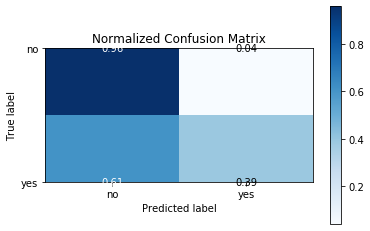

In [200]:
#Visualising Confusion Matrix

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
cv_pred = cross_val_predict(rf, Xt, y)
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y, cv_pred, normalize=True)

#matplotlib.axes._subplots.AxesSubplot object at 0x7fe967d64490

plt.show()

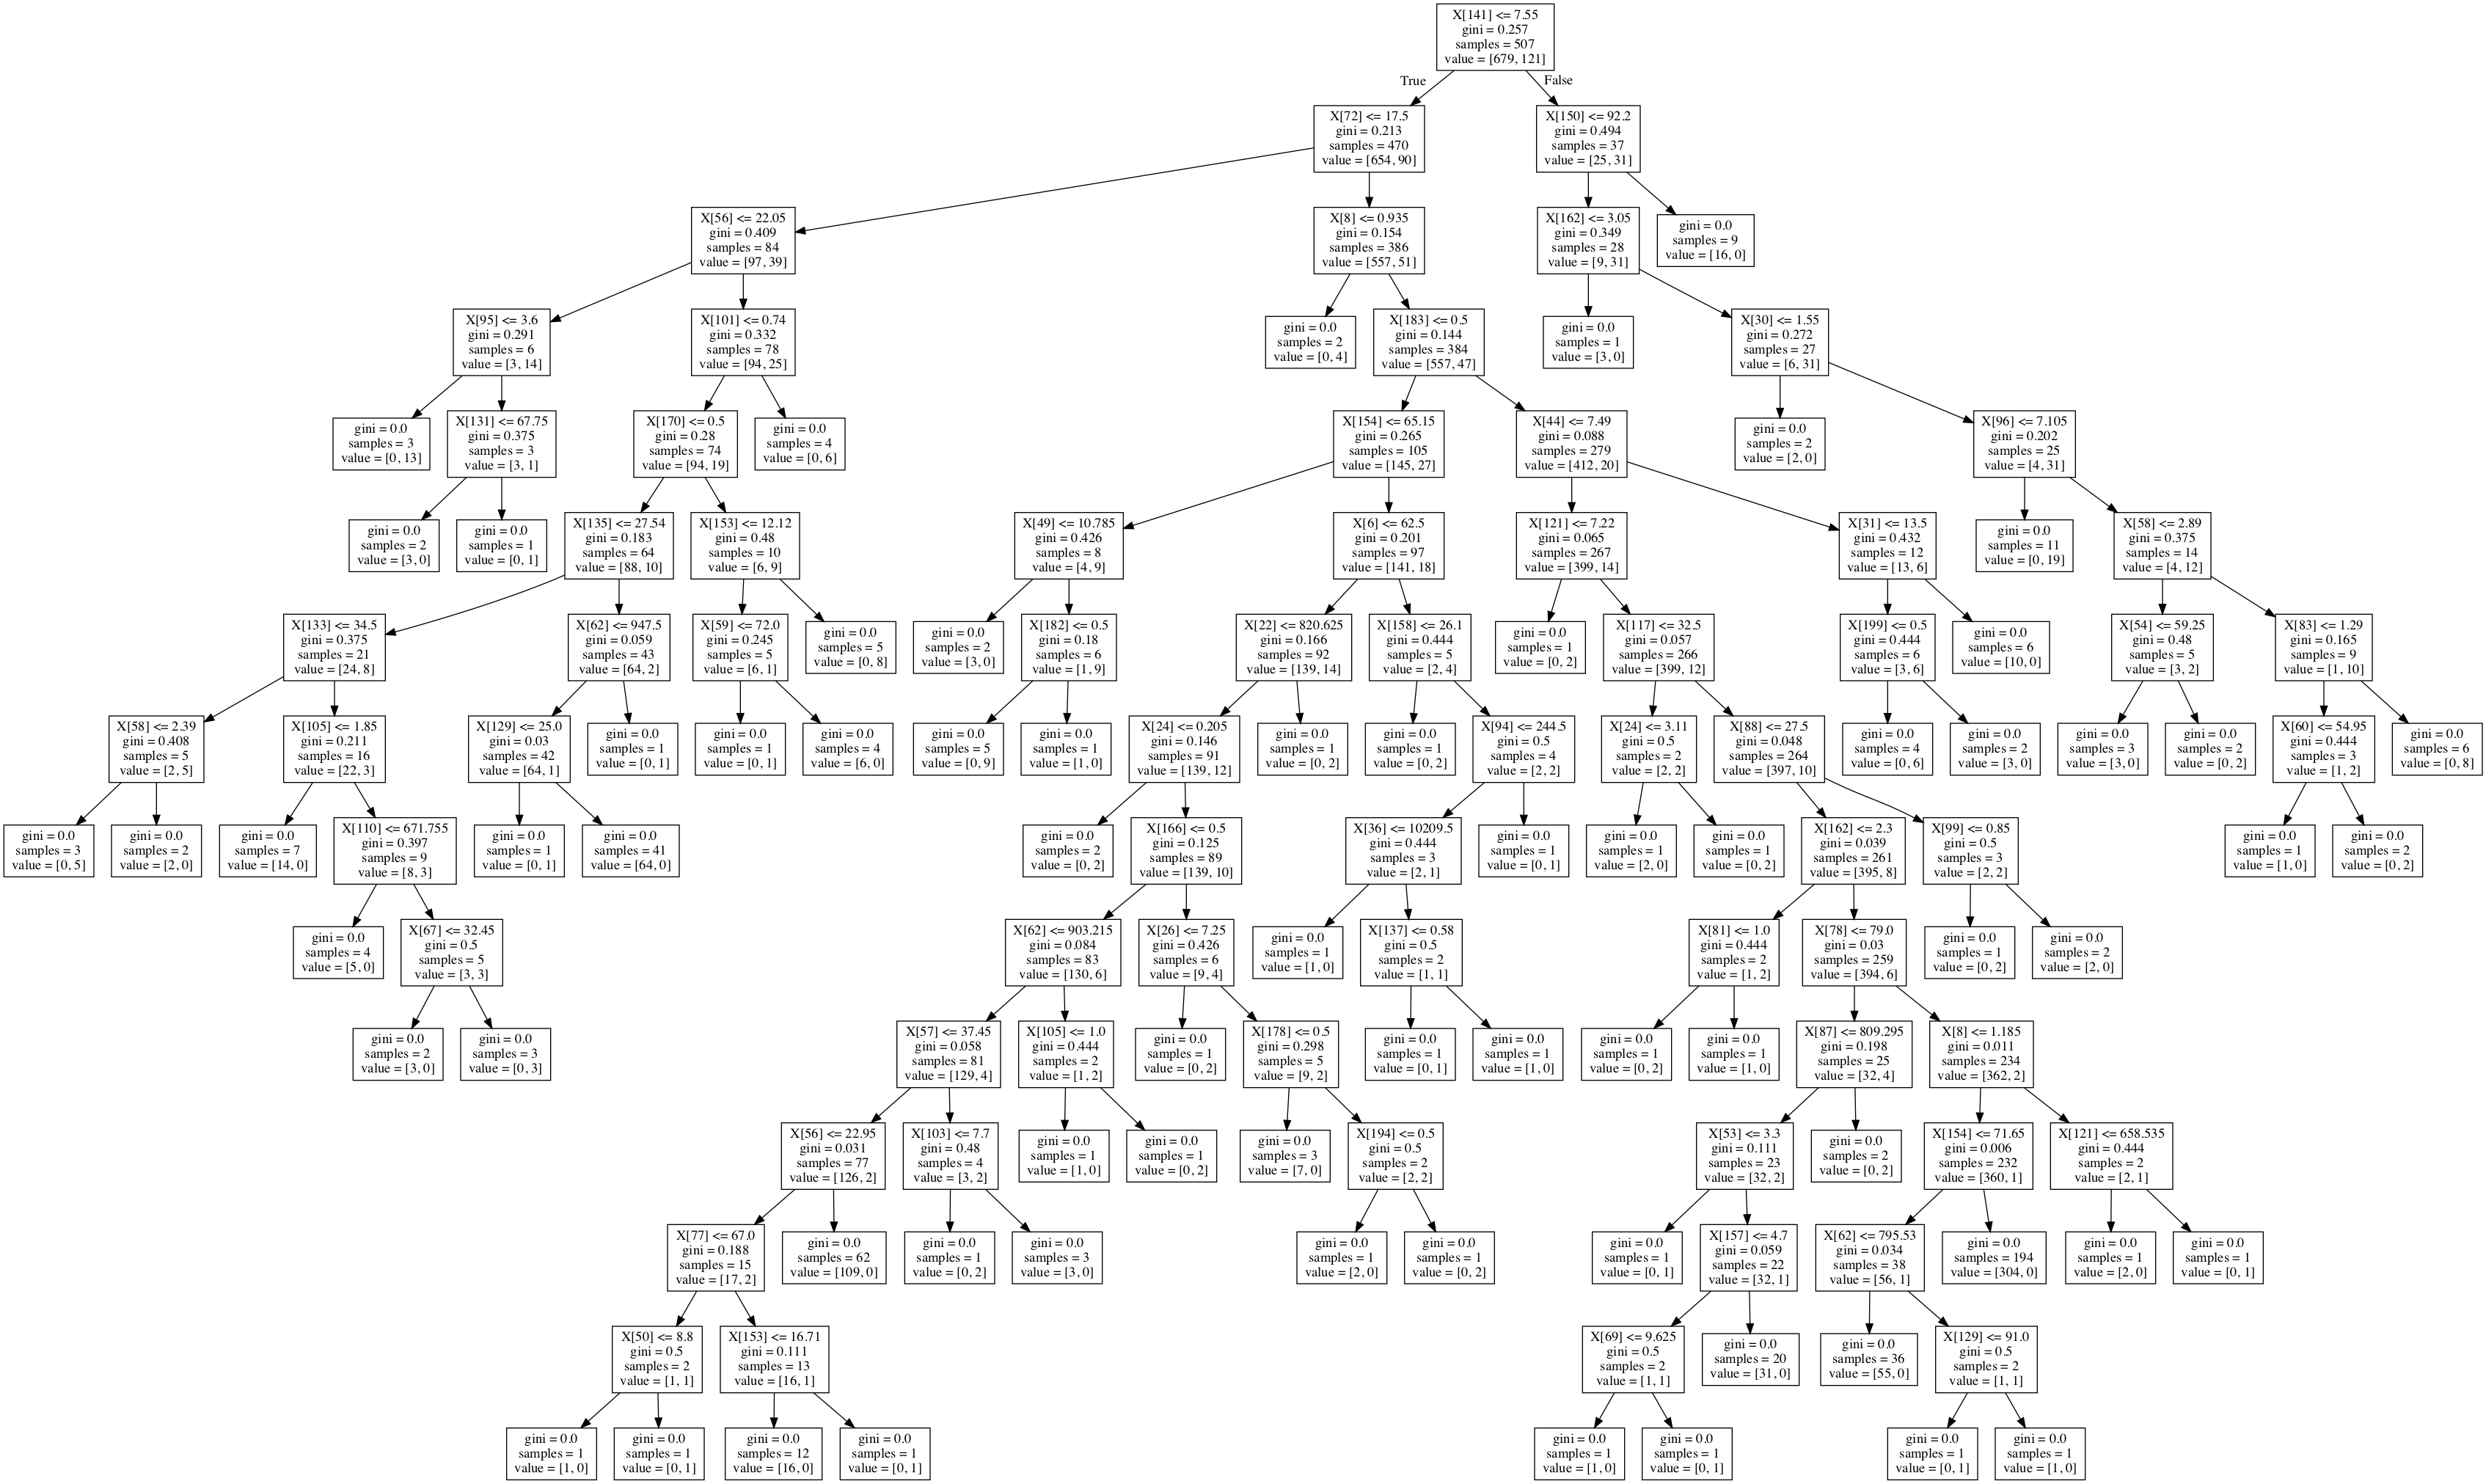

In [201]:
#visualizing the tree

from sklearn.tree import export_graphviz
import pydotplus
import six
from sklearn import tree
import os

dotfile = six.StringIO()

i_tree = 0
for tree_in_forest in rf.estimators_:
    if (i_tree ==3):        
        tree.export_graphviz(tree_in_forest, out_file=dotfile)
        graph = pydotplus.graph_from_dot_data(dotfile.getvalue())        
    i_tree = i_tree + 1
Image(graph.create_png())



In [202]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [203]:
#determining the ranges of hyperparameters 

param_space={
'max_depth' : [7, 9, 11, 13, None],
'min_samples_split' : [2, 3, 5],
'min_samples_leaf' : [1, 2, 3, 5],
'max_features' : [4, 8, None],
'n_estimators' : [100] }

In [204]:
#running a grid search with cross validation 

from sklearn.model_selection import GridSearchCV
# rf = RandomForestClassifier()
# classifier = RandomForestClassifier(n_estimators=300, random_state=0)
# clf_gs = GridSearchCV(estimator=classifier, param_grid=param_space, cv=5, n_jobs=-1)
clf_gs1 = GridSearchCV(estimator=rf, param_grid=param_space, cv=5, n_jobs=-1)

In [205]:
#training the model: not dividing into train and test sets because of cross-validation - RUNS LO-OONG TIME

clf_gs1.fit(Xt, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [206]:
#calling the best performing estimator

clf_gs1.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [207]:
#directly showing the best hyperparameters

clf_gs1.best_params_

{'max_depth': 13,
 'max_features': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [208]:
#it gave the 0.88 accuracy from the cross-validation result

clf_gs1.best_score_ 

# Wait, how do I know if the metric used is accuracy? I didn't see it was specified in our models above..
# By default the grid search will follow the base estimator's metric default. In decision tree classifier, it's the accuracy.

0.880970558553815

In [209]:
#pulling the full result from cross validation

clf_gs1.cv_results_

{'mean_fit_time': array([0.25418663, 0.25549021, 0.26324763, 0.25287304, 0.23746266,
        0.21577907, 0.23885579, 0.23129663, 0.23893647, 0.25029364,
        0.27369442, 0.27414088, 0.36010137, 0.36309171, 0.38512444,
        0.39567494, 0.36177993, 0.32729721, 0.31481957, 0.3218358 ,
        0.32138467, 0.30268764, 0.28892016, 0.28718047, 4.91484804,
        4.89618301, 4.55781188, 4.30321674, 4.36097422, 4.603267  ,
        4.54298263, 4.79747624, 4.85390406, 4.61795092, 4.46117554,
        4.50441523, 0.33628173, 0.32155132, 0.30804696, 0.28837724,
        0.26833706, 0.26673284, 0.26146154, 0.26103477, 0.26073203,
        0.25465803, 0.31724153, 0.34615564, 0.45953584, 0.44692755,
        0.45367222, 0.47332821, 0.4672616 , 0.39556928, 0.38103476,
        0.37429295, 0.42333245, 0.42931123, 0.39882793, 0.36514578,
        6.04027381, 6.03698401, 6.18780861, 6.25510778, 6.3871593 ,
        6.8507853 , 6.73086152, 6.57212381, 6.56759095, 6.29324512,
        6.28193903, 6.28713746,

### AUC = 0.9

AUC: 0.91


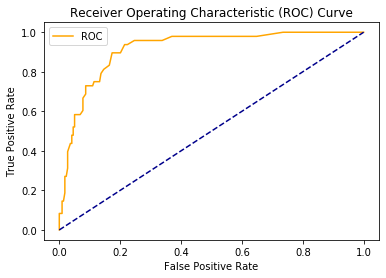

In [210]:
#runnig ROC curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
from sklearn.metrics import roc_curve, auc, roc_auc_score
# rf.fit(Xt_test, y_test)
probs = rf.predict_proba(Xt_test)
probs = probs[:, 1]
probs
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

y_test1 = y_test.eq('yes').mul(1)
y_test1
fpr, tpr, thresholds = roc_curve(y_test1, probs)
plot_roc_curve(fpr, tpr)

In [211]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = df_mt_ri_withdummies.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
cit_rteg_angle,0.030649
cit_functfib_angle,0.025491
cit_rteg_cl60,0.024338
ed_hr,0.024067
cit_rteg_tma,0.020216
ed_hr1_pao2,0.017310
ed_hr1_sbp,0.014291
first_hospital_paco2,0.014200
cn_tpa150_tg,0.013344
ed_hr1_act,0.013280


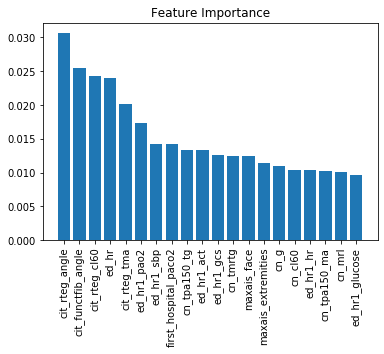

In [216]:
#creating a list of features
#Sort feature importances in descending order
indices = np.argsort(rf.feature_importances_)[::-1]
indices1 = indices[0:20]

#Rearrange feature names so they match the sorted feature importances
names = [df_mt_ri_withdummies.columns[i] for i in indices]
names1 = names[0:20]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(20), rf.feature_importances_[indices1])

# Add feature names as x-axis labels
plt.xticks(range(20), names1, rotation=90)

# Show plot
plt.show()

### When trying to fit RF model with class_weight="balanced" option the model accuracy went down from 87% to 85%




In [217]:
#then fitting the model on the test set with class_weight=balanced option

rfb = RandomForestClassifier(class_weight="balanced", n_estimators=1000, oob_score=True)
rfb.fit(Xt_train, y_train)
    
print ("Trained model :: ", rfb)
predictions = rfb.predict(Xt_test)

# Train and Test Accuracy
print("Train Accuracy :: ", accuracy_score(y_train, rfb.predict(Xt_train)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Trained model ::  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)
Train Accuracy ::  1.0
Test Accuracy  ::  0.8539325842696629


In [218]:
feature_importances = pd.DataFrame(rfb.feature_importances_,
                                   index = df_mt_ri_withdummies.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
cit_functfib_angle,0.035084
ed_hr,0.030789
ed_hr1_act,0.030185
ed_hr1_pao2,0.024281
cit_rteg_cl60,0.023949
cit_rteg_tma,0.023927
maxais_chest,0.016061
ed_hr1_angle,0.015366
maxais_face,0.013669
cn_tmrtg,0.012785


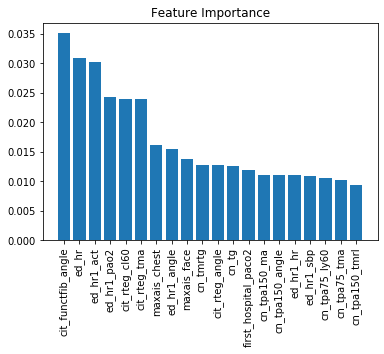

In [219]:
#creating a list of features
#Sort feature importances in descending order
indices = np.argsort(rfb.feature_importances_)[::-1]
indices1 = indices[0:20]

#Rearrange feature names so they match the sorted feature importances
names = [df_mt_ri_withdummies.columns[i] for i in indices]
names1 = names[0:20]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(20), rfb.feature_importances_[indices1])

# Add feature names as x-axis labels
plt.xticks(range(20), names, rotation=90)

# Show plot
plt.show()

## Conclusion: I was able to find 20 features that predict the massive transfusion according to definition #6 (mt_ri). 